<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/hdfc_raj_all_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.
install.packages("ranger")
install.packages("e1071")
install.packages("LiblineaR")
install.packages("caret")
install.packages("TSstudio")
install.packages("vars")
install.packages("xgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘RcppArmadillo’, ‘Quandl’, ‘rugarch’, ‘ADGofTest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’, ‘tseries’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtes

# New Section

In [5]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)
library(ranger)
library(e1071)
library(caret)
library(LiblineaR)
library(TSstudio)
library(data.table)
library(vars)
library("vars")
library(xgboost)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘PerformanceAnalytics’


The following objects are masked from ‘package:e1071’:

    kurtosis, skewness


The following object is masked from ‘package:graphics’:

    legend



Attaching package: ‘TSA’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:e1071’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 

Loading required package: timeDate


Attaching

In [34]:
# Download data from Yahoo Finance
HDFCBank<-getSymbols("HDFCBANK.NS",from="2016-12-31",auto.assign=FALSE)


           HDFCBANK.NS.Open HDFCBANK.NS.High HDFCBANK.NS.Low HDFCBANK.NS.Close
2017-01-02          604.725          605.050         596.025           598.550
2017-01-03          600.400          600.975         592.875           594.950
2017-01-04          594.925          596.000         591.900           592.750
2017-01-05          594.500          597.250         591.550           593.100
2017-01-06          595.050          599.200         594.100           596.825
2017-01-09          599.425          602.075         596.075           597.600
           HDFCBANK.NS.Volume HDFCBANK.NS.Adjusted
2017-01-02            1854328             583.3473
2017-01-03            1923750             579.8387
2017-01-04            3483560             577.6946
2017-01-05            3388192             578.0356
2017-01-06            2762630             581.6661
2017-01-09            2286898             582.4213

           HDFCBANK.NS.Open HDFCBANK.NS.High HDFCBANK.NS.Low HDFCBANK.NS.Close
2022-04-20          1354.45          1359.90         1335.35           1354.30
2022-04-21          1365.00          1379.80         1353.30           1374.35
2022-04-22          1360.00          1375.35         1349.15           1355.60
2022-04-25          1350.00          1370.65         1322.25           1365.75
2022-04-26          1372.00          1381.95         1357.15           1372.05
2022-04-27          1360.00          1379.00         1356.10           1372.55
           HDFCBANK.NS.Volume HDFCBANK.NS.Adjusted
2022-04-20           24662868              1354.30
2022-04-21           26223135              1374.35
2022-04-22           10329574              1355.60
2022-04-25           10467744              1365.75
2022-04-26            8508421              1372.05
2022-04-27            9027167              1372.55

     Index            HDFCBANK.NS.Open HDFCBANK.NS.High HDFCBANK.NS.Low 
 Min.   :2017-01-02   Min.   : 594.5   Min.   : 596     Min.   : 591.5  
 1st Qu.:2018-04-30   1st Qu.: 944.8   1st Qu.: 955     1st Qu.: 932.8  
 Median :2019-09-01   Median :1093.3   Median :1105     Median :1083.0  
 Mean   :2019-08-30   Mean   :1144.8   Mean   :1156     Mean   :1132.8  
 3rd Qu.:2020-12-28   3rd Qu.:1390.0   3rd Qu.:1409     3rd Qu.:1372.6  
 Max.   :2022-04-27   Max.   :1705.0   Max.   :1725     Max.   :1671.0  
 HDFCBANK.NS.Close HDFCBANK.NS.Volume  HDFCBANK.NS.Adjusted
 Min.   : 592.8    Min.   :   285004   Min.   : 577.7      
 1st Qu.: 943.5    1st Qu.:  3514836   1st Qu.: 927.6      
 Median :1092.5    Median :  5658980   Median :1084.8      
 Mean   :1144.3    Mean   :  7599324   Mean   :1134.8      
 3rd Qu.:1391.1    3rd Qu.:  9401235   3rd Qu.:1385.1      
 Max.   :1688.7    Max.   :201129980   Max.   :1688.7      

[1] 1314    6

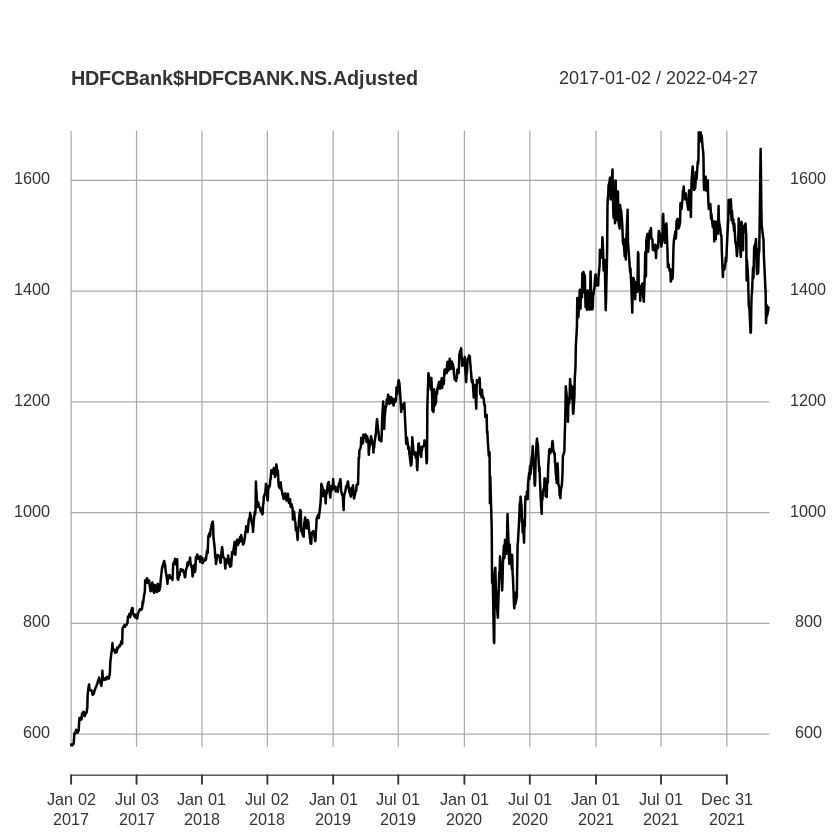

In [35]:
# Plotting the data downloaded from Yahoo Finance (Time Series Data)
head(HDFCBank)
tail(HDFCBank)
plot(HDFCBank$HDFCBANK.NS.Adjusted)
summary(HDFCBank)# To understand any missing values in any columns
HDFCBank<-na.omit(HDFCBank)# Remove the rows containing the missing data
HDFCBank<-HDFCBank[HDFCBank$HDFCBANK.NS.Volume>0,]
dim(HDFCBank)

In [37]:
# Computing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
HDFCBank_returns<-Return.calculate(HDFCBank$HDFCBANK.NS.Adjusted,method = "log")
head(HDFCBank_returns)


           HDFCBANK.NS.Adjusted
2017-01-02                   NA
2017-01-03        -0.0060326647
2017-01-04        -0.0037047183
2017-01-05         0.0005902156
2017-01-06         0.0062611008
2017-01-09         0.0012974766

In [38]:
# Removing the blank rows
HDFCBank_returns<-na.omit(HDFCBank_returns)

In [39]:
Prices<-HDFCBank[,6]
returns<-HDFCBank_returns
Prices<- na.omit(Prices)
returns<-na.omit(returns)



In [40]:
head(Prices)
head(returns)

           HDFCBANK.NS.Adjusted
2017-01-02             583.3473
2017-01-03             579.8387
2017-01-04             577.6946
2017-01-05             578.0356
2017-01-06             581.6661
2017-01-09             582.4213

           HDFCBANK.NS.Adjusted
2017-01-03        -0.0060326647
2017-01-04        -0.0037047183
2017-01-05         0.0005902156
2017-01-06         0.0062611008
2017-01-09         0.0012974766
2017-01-10         0.0158954985

------------------------------------------------------------------------------ 
Describe as.data.frame(Prices) (data.frame):

data frame:	1314 obs. of  1 variables
		1314 complete cases (100.0%)

  Nr  ColName               Class    NAs  Levels
  1   HDFCBANK.NS.Adjusted  numeric  .          


------------------------------------------------------------------------------ 
1 - HDFCBANK.NS.Adjusted (numeric)

      length         n       NAs      unique          0s        mean'
       1'314     1'314         0       1'288           0  1'134.7895
                100.0%      0.0%                    0.0%            
                                                                    
         .05       .10       .25      median         .75         .90
    701.7223  824.7876  927.6379  1'084.8174  1'385.1053  1'515.1700
                                                                    
       range        sd     vcoef         mad         IQR        skew
  1'111.0054  263.0496    0.2318   

------------------------------------------------------------------------------ 
Describe as.data.frame(returns) (data.frame):

data frame:	1313 obs. of  1 variables
		1313 complete cases (100.0%)

  Nr  ColName               Class    NAs  Levels
  1   HDFCBANK.NS.Adjusted  numeric  .          


------------------------------------------------------------------------------ 
1 - HDFCBANK.NS.Adjusted (numeric)

        length             n           NAs       unique           0s'
         1'313         1'313             0          = n            1
                      100.0%          0.0%                      0.1%
                                                                    
           .05           .10           .25       median          .75
  -0.022197871  -0.014609474  -0.006585093  0.000755383  0.007577097
                                                                    
         range            sd         vcoef          mad          IQR
   0.244500975   0.016192246  24.8

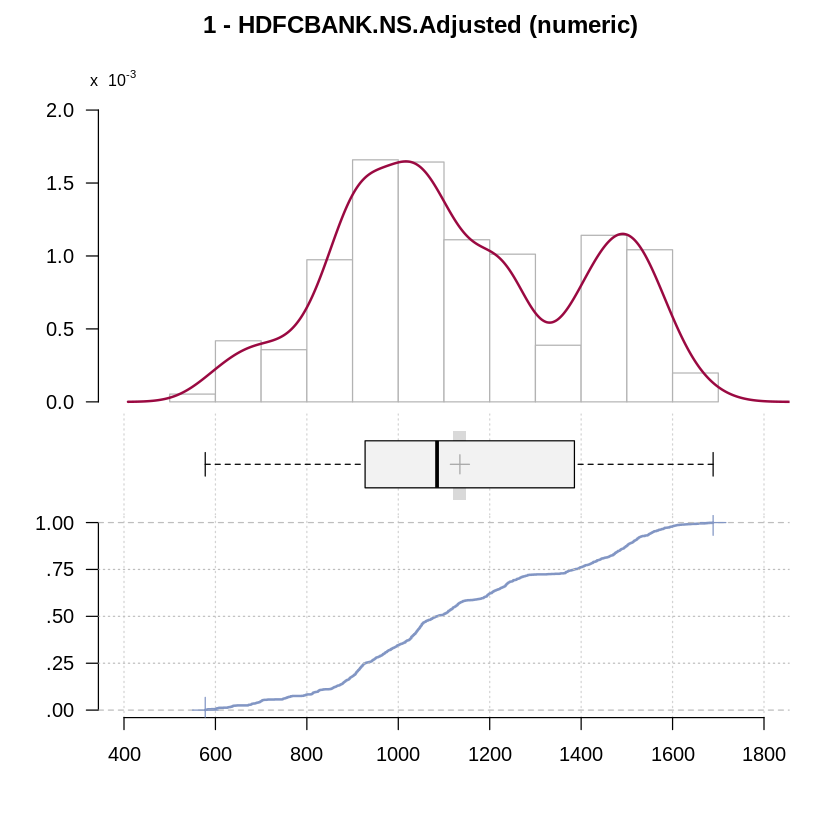

,HDFCBANK.NS.Adjusted
,<dbl>
nobs,1.314000e+03
NAs,0.000000e+00
Minimum,5.776946e+02
Maximum,1.688700e+03
1. Quartile,9.276379e+02
3. Quartile,1.385105e+03
Mean,1.134789e+03
Median,1.084817e+03
Sum,1.491113e+06


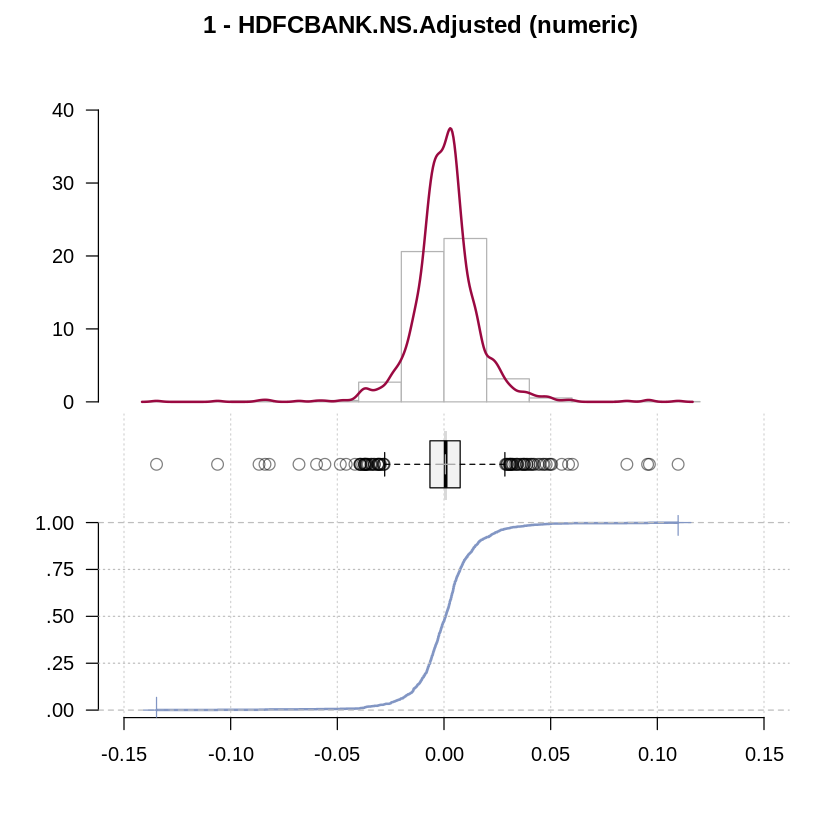

In [41]:
#Exploratory Data Analysis
#Calculating descriptive statistics
Desc(as.data.frame(Prices))
Desc(as.data.frame(returns))
basicStats(Prices)

In [42]:
#Test of Normality
jarqueberaTest(Prices$HDFCBANK.NS.Adjusted)
jarqueberaTest(returns$HDFCBANK.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 51.1904
  P VALUE:
    Asymptotic p Value: 7.659e-12 

Description:
 Thu Apr 28 16:20:56 2022 by user: 


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 6454.9105
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Thu Apr 28 16:20:56 2022 by user: 


In [43]:
shapiroTest(Prices$HDFCBANK.NS.Adjusted)
shapiroTest(returns$HDFCBANK.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9637
  P VALUE:
    < 2.2e-16 

Description:
 Thu Apr 28 16:21:05 2022 by user: 


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.8884
  P VALUE:
    < 2.2e-16 

Description:
 Thu Apr 28 16:21:05 2022 by user: 


In [44]:
# Tests of Stationarity
summary(ur.df(Prices$HDFCBANK.NS.Adjusted))
summary(ur.df(returns$HDFCBANK.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-110.423   -7.863    0.390    8.202  148.580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
z.lag.1    0.0002763  0.0004447   0.621   0.5345  
z.diff.lag 0.0505947  0.0276051   1.833   0.0671 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.76 on 1310 degrees of freedom
Multiple R-squared:  0.002915,	Adjusted R-squared:  0.001392 
F-statistic: 1.915 on 2 and 1310 DF,  p-value: 0.1478


Value of test-statistic is: 0.6213 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.132431 -0.006578  0.000709  0.007856  0.099232 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.03451    0.03814 -27.126  < 2e-16 ***
z.diff.lag  0.07971    0.02755   2.893  0.00388 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01616 on 1309 degrees of freedom
Multiple R-squared:  0.4824,	Adjusted R-squared:  0.4816 
F-statistic:   610 on 2 and 1309 DF,  p-value: < 2.2e-16


Value of test-statistic is: -27.1259 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [45]:
summary(ur.kpss(Prices$HDFCBANK.NS.Adjusted))
summary(ur.kpss(returns$HDFCBANK.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 13.2458 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.1699 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.085 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


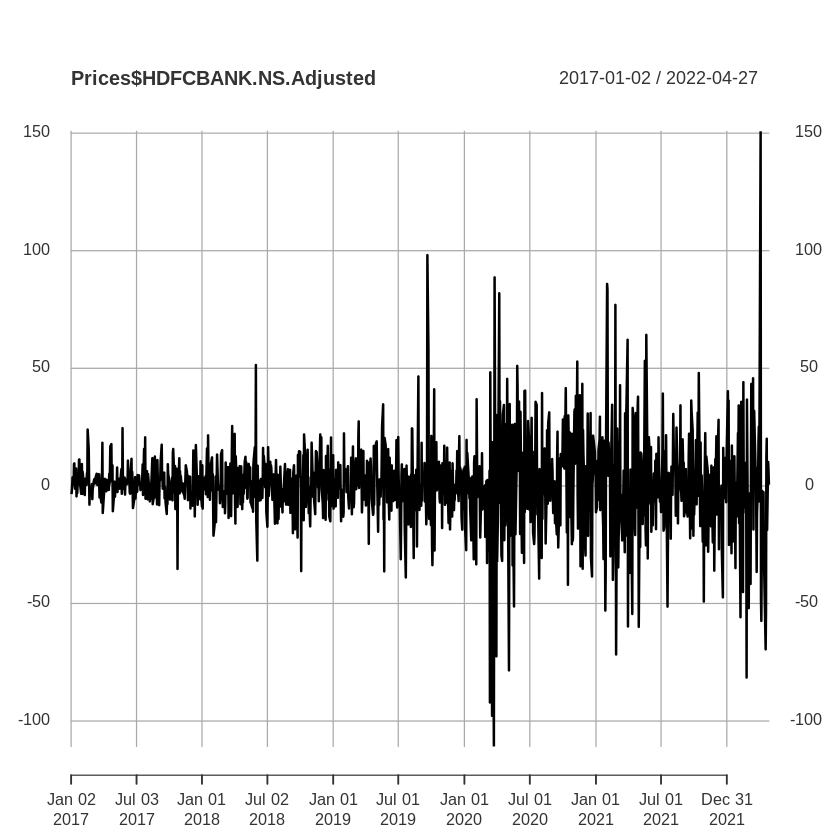

In [46]:
# Make it stationary
# Differencing the data

Prices<-diff(Prices)
plot(Prices$HDFCBANK.NS.Adjusted)
summary(ur.kpss(Prices$HDFCBANK.NS.Adjusted))
Prices<-na.omit(Prices)

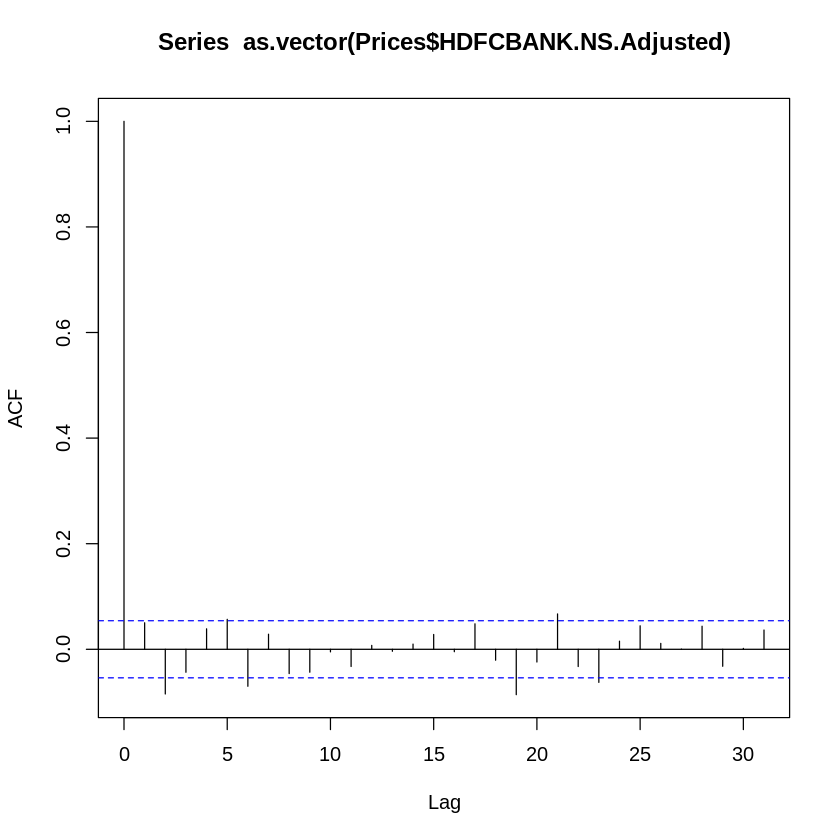

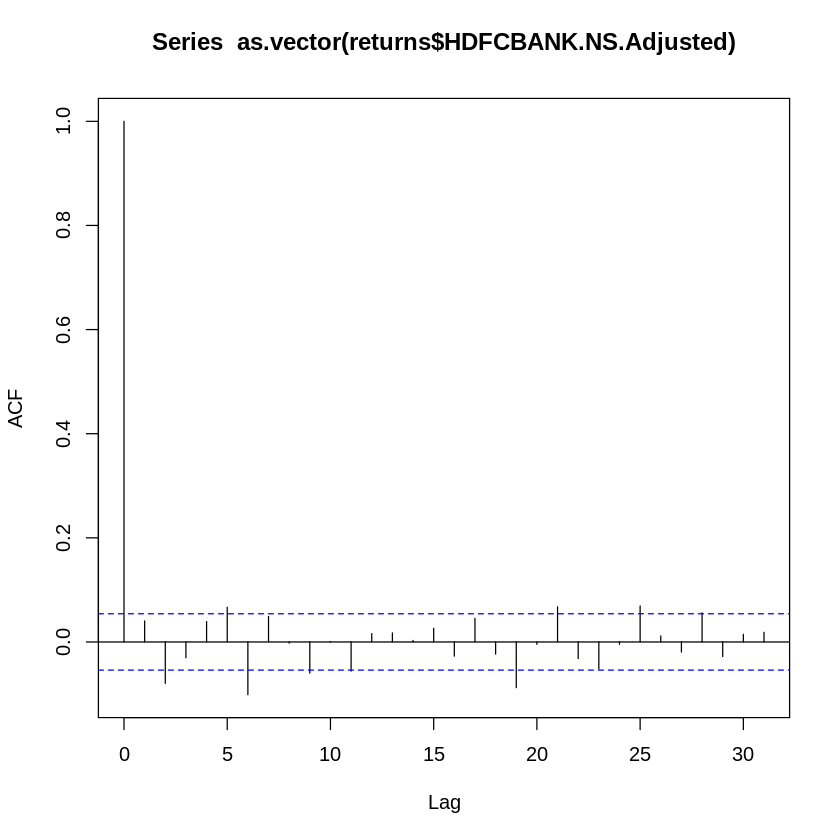

In [47]:
# Auto correlation plots - Advised on Stationary data
stats::acf(as.vector(Prices$HDFCBANK.NS.Adjusted))
stats::acf(as.vector(returns$HDFCBANK.NS.Adjusted))

In [57]:

Box.test(as.vector(Prices$HDFCBANK.NS.Adjusted), lag =10, type = "Ljung-Box")
Box.test(as.vector(returns$HDFCBANK.NS.Adjusted), lag =10, type = "Ljung-Box")



	Box-Ljung test

data:  as.vector(Prices$HDFCBANK.NS.Adjusted)
X-squared = 34.335, df = 10, p-value = 0.000162



	Box-Ljung test

data:  as.vector(returns$HDFCBANK.NS.Adjusted)
X-squared = 41.06, df = 10, p-value = 1.101e-05


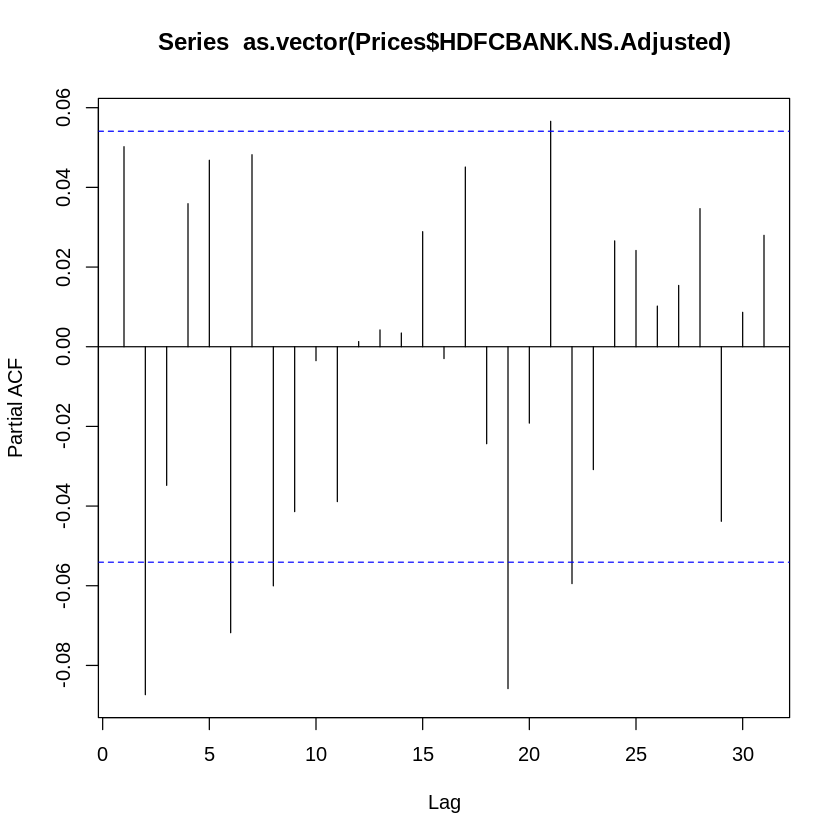

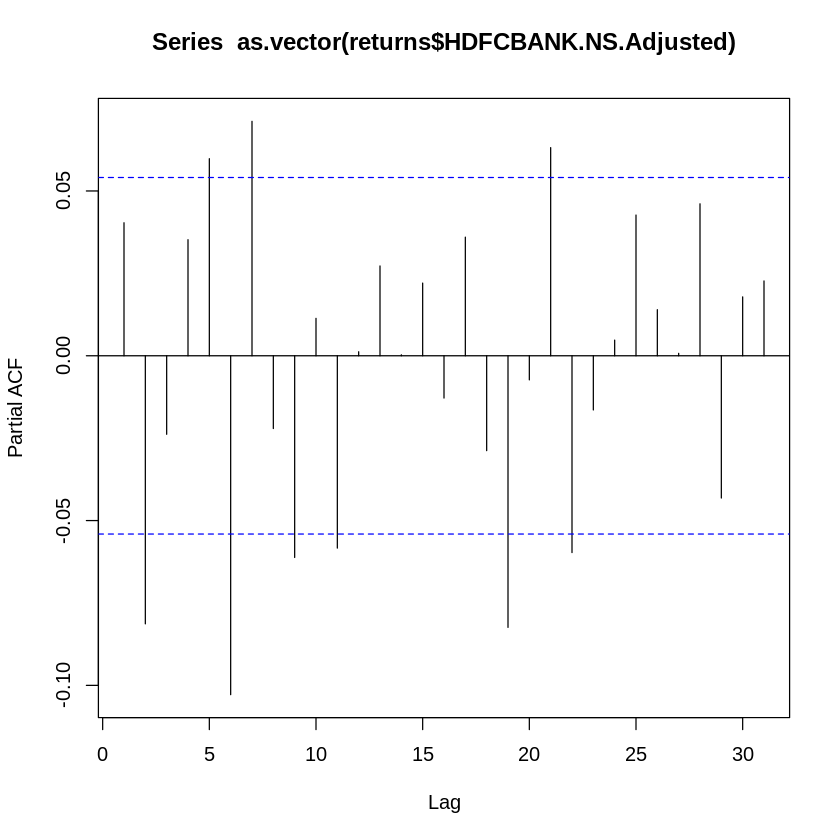

In [58]:
# Partial Autocorrelation Function
pacf(as.vector(Prices$HDFCBANK.NS.Adjusted))
pacf(as.vector(returns$HDFCBANK.NS.Adjusted))

In [59]:
model1<-auto.arima(as.vector(Prices$HDFCBANK.NS.Adjusted),max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
model2<-auto.arima(as.vector(returns$HDFCBANK.NS.Adjusted),max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)



 Fitting models using approximations to speed things up...

 ARIMA(2,0,2) with non-zero mean : 11419.31
 ARIMA(0,0,0) with non-zero mean : 11427.83
 ARIMA(1,0,0) with non-zero mean : 11427.47
 ARIMA(0,0,1) with non-zero mean : 11425.86
 ARIMA(0,0,0) with zero mean     : 11427.17
 ARIMA(1,0,2) with non-zero mean : 11421.78
 ARIMA(2,0,1) with non-zero mean : 11421.63
 ARIMA(3,0,2) with non-zero mean : Inf
 ARIMA(2,0,3) with non-zero mean : 11413.41
 ARIMA(1,0,3) with non-zero mean : 11422.51
 ARIMA(3,0,3) with non-zero mean : Inf
 ARIMA(2,0,4) with non-zero mean : 11409.67
 ARIMA(1,0,4) with non-zero mean : 11422.87
 ARIMA(3,0,4) with non-zero mean : 11415.91
 ARIMA(2,0,5) with non-zero mean : 11410.05
 ARIMA(1,0,5) with non-zero mean : 11411.23
 ARIMA(3,0,5) with non-zero mean : 11412.05
 ARIMA(2,0,4) with zero mean     : 11408.99
 ARIMA(1,0,4) with zero mean     : 11422.25
 ARIMA(2,0,3) with zero mean     : Inf
 ARIMA(3,0,4) with zero mean     : 11415.33
 ARIMA(2,0,5) with zero mean  


	Ljung-Box test

data:  Residuals from ARIMA(2,0,4) with zero mean
Q* = 6.6279, df = 4, p-value = 0.1569

Model df: 6.   Total lags used: 10



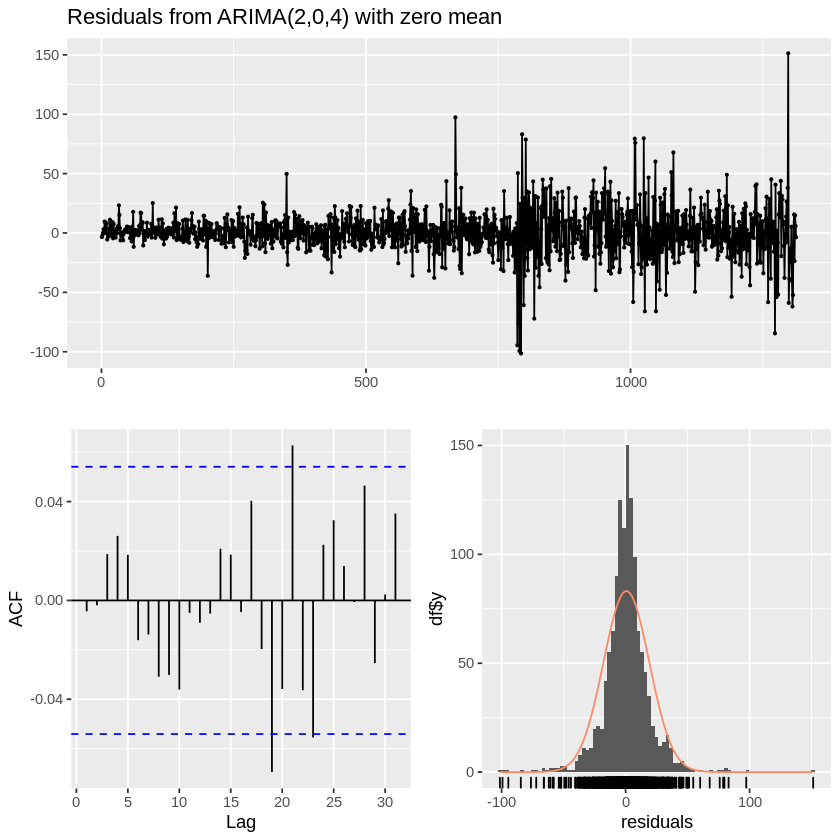


	Ljung-Box test

data:  Residuals from ARIMA(3,0,5) with non-zero mean
Q* = 6.3395, df = 3, p-value = 0.09621

Model df: 9.   Total lags used: 12



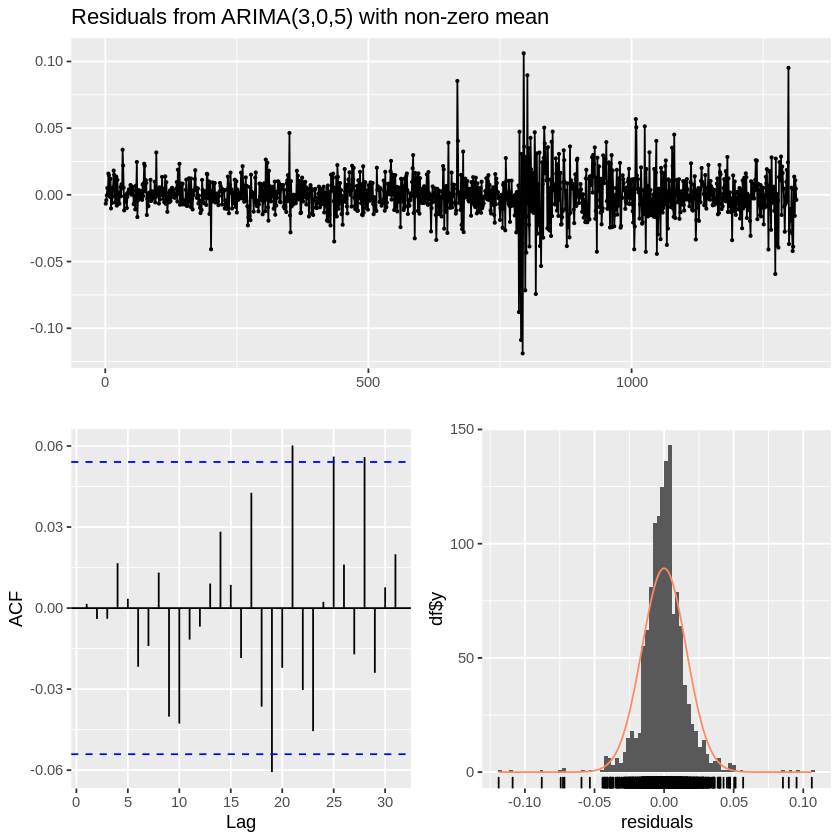

In [61]:
checkresiduals(model1)
checkresiduals(model2)

In [86]:
accuracy(model1)
accuracy(model2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.6355618,18.52859,12.35828,Inf,Inf,0.7132172,-0.004409734


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.3612577,25.272,18.26134,161.1943,174.9742,0.7153108,0.008168855


[1] 21.41893

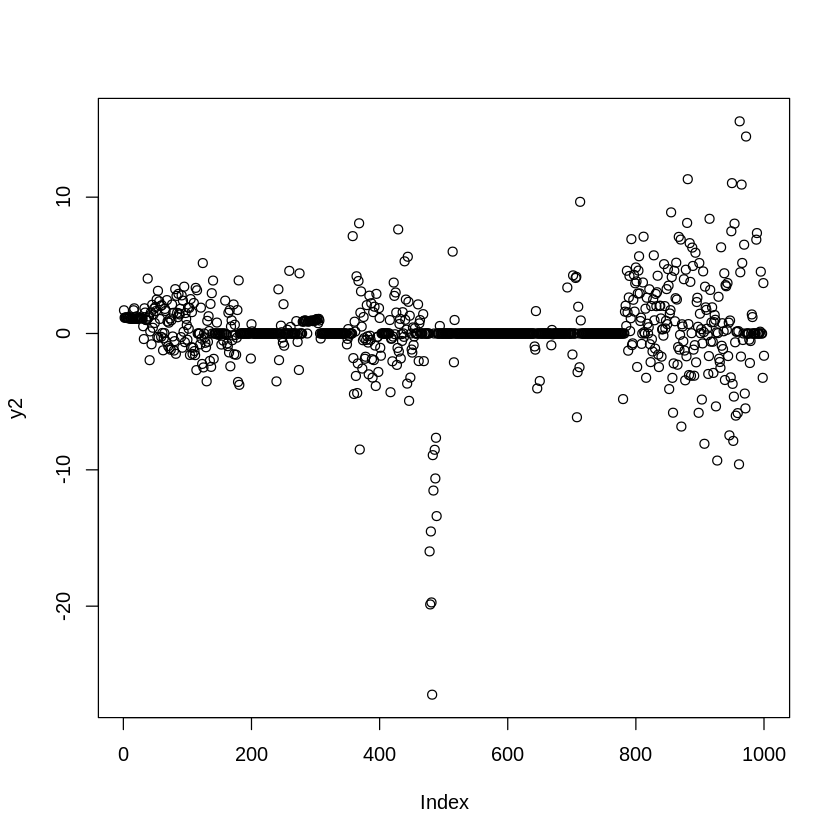

In [63]:
# ARIMA without BC
# Training and Testing Data

# Rolling window based reliance price prediction - Test window is 1000 days - 1day drift
y2<-c()
numrows <-nrow(Prices)
for (i in 1:1000) {
  
  model2<-auto.arima(as.vector(Prices$HDFCBANK.NS.Adjusted[i:(i+numrows-1001)]),max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(Prices$HDFCBANK.NS.Adjusted,1000)) 

[1]  2.224554e-03  3.247516e-04  1.003314e-03  2.463548e-03  8.855033e-04
   [6]  2.304112e-03  1.698912e-03  5.063412e-04  2.153646e-03  1.521473e-03
  [11]  1.634233e-04  1.390469e-03  5.111235e-04  1.883625e-03  8.944696e-04
  [16]  2.436929e-03  2.385044e-03  1.101120e-03  2.184700e-03  1.398357e-03
  [21]  1.547536e-03  1.779123e-03  1.882180e-03  2.095525e-03  1.663401e-03
  [26]  2.023466e-03  5.901183e-04  1.589832e-03 -6.012431e-05  4.155120e-04
  [31]  3.636890e-04  8.262581e-05  2.338000e-03  1.829604e-03  1.206707e-03
  [36]  8.205755e-04  1.238954e-03  1.409411e-03  1.367641e-03  1.382151e-03
  [41]  1.300164e-03  4.384964e-04  2.173524e-03 -9.338794e-05  2.040426e-03
  [46]  1.268177e-03  1.161583e-03  1.466313e-03  5.616074e-04  1.148097e-03
  [51]  1.290098e-03  2.483655e-03  6.951737e-05  1.219374e-03  9.168638e-06
  [56]  2.411322e-03  1.192670e-03  2.139502e-03 -3.175017e-05  2.017354e-03
  [61]  1.501650e-03  2.854926e-03  8.441907e-04  1.084922e-03  1.852323e-03
  [66]  1.766033e-03  8.274240e-05  2.456541e-03  1.044357e-03 -1.763172e-04
  [71]  1.244330e-03  6.068383e-04  7.875700e-04 -5.429714e-04  1.160136e-03
  [76]  2.026085e-03  1.353326e-04  1.927217e-03 -1.211869e-04 -4.814781e-05
  [81]  2.306113e-03  1.111582e-03  1.395054e-03  3.042670e-04  1.559481e-03
  [86]  2.837103e-03  1.616022e-03  1.604652e-03  1.340616e-03 -5.276085e-04
  [91]  2.013353e-03  9.598428e-04  2.308261e-03 -2.185899e-04  1.919672e-04
  [96] -5.591899e-04  1.397952e-03  1.095075e-03  1.292027e-03 -5.059717e-04
 [101]  1.138148e-03  4.485121e-04  1.987517e-03 -2.253133e-03  2.208119e-03
 [106] -8.860161e-04  1.554554e-03 -5.474682e-04 -9.508989e-04  1.413002e-03
 [111] -1.455954e-04 -1.432711e-03  2.464177e-03 -2.483759e-03  2.809420e-03
 [116]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [121]  1.795350e-03  0.000000e+00 -2.006095e-03  0.000000e+00  0.000000e+00
 [126]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -1.406395e-03
 [131]  9.754839e-04  0.000000e+00  0.000000e+00  9.113776e-04 -1.835708e-03
 [136]  1.978631e-03 -6.832561e-04  2.760113e-03  0.000000e+00  3.803440e-03
 [141] -1.747839e-03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [146]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [151]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [156] -4.623778e-04  0.000000e+00  0.000000e+00  2.186146e-03 -1.081405e-04
 [161] -3.394649e-05 -6.998441e-04 -7.917533e-04  1.332860e-03  0.000000e+00
 [166]  1.521580e-03 -2.155954e-03  4.376779e-04  9.061641e-04 -5.676161e-04
 [171] -1.060271e-04  1.868249e-03 -1.339870e-03  5.702135e-04  0.000000e+00
 [176] -1.365934e-03 -2.929502e-04  2.320271e-03 -3.157961e-03  2.452672e-03
 [181] -3.397452e-03  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [186]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [191]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [196]  0.000000e+00  0.000000e+00  0.000000e+00  4.594731e-04  6.479433e-04
 [201]  1.182337e-04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [206]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [211]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [216]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [221]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [226]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
 [231]  0.000000e+00  0.000000e+00  1.690423e-03  0.000000e+00  0.000000e+00
 [236]  0.000000e+00  0.000000e+00  0.000000e+00 -3.120476e-03  0.000000e+00
 [241]  0.000000e+00  3.109443e-03 -1.882708e-03  0.000000e+00  0.000000e+00
 [246]  5.985633e-04  1.051291e-04 -3.056016e-04 -5.163731e-04  2.203762e-03
 [251] -1.448451e-03  0.000000e+00  0.000000e+00  2.346170e-03  0.000000e+00
 [256] -5.043474e-05  0.000000e+00 -2.985331e-03  4.103384e-03  2.125365e-03

[1] 0.01851733

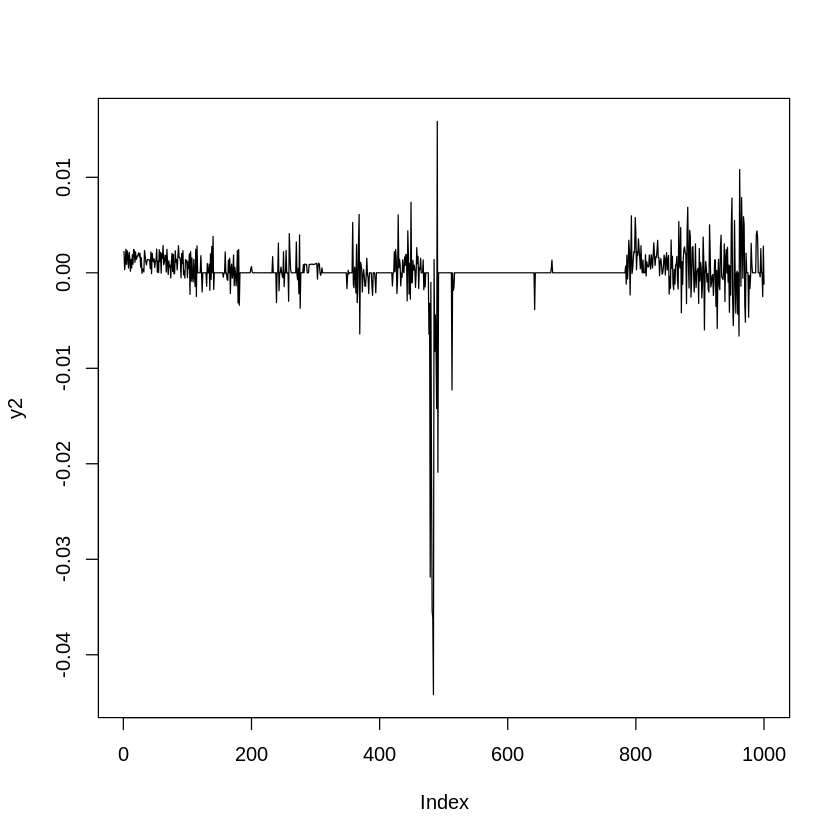

In [64]:
# Rolling window based reliance returns prediction - Test window is 1000 days - 1day drift
y2<-c()
numrows <-nrow(returns)
for (i in 1:1000) {
  
  model3<-auto.arima(as.vector(returns$HDFCBANK.NS.Adjusted[i:(i+numrows-1001)]),max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y2<-c(y2,y)
}
y2
plot(y2,type = "l")
RMSE(y2,tail(returns$HDFCBANK.NS.Adjusted,1000)) 

In [66]:
# Forecasting using External variables (vector Autoregression)
HDFCBank<-getSymbols("HDFCBANK.NS",from="2006-12-31",auto.assign=FALSE)
Gold<-getSymbols("GC=F",from="2006-12-31",auto.assign=FALSE)
IDBI<-getSymbols("IDBI.NS",from="2006-12-31",auto.assign=FALSE)
FEDERALBank<-getSymbols("FEDERALBNK.NS",from="2006-12-31",auto.assign=FALSE)
MuthootFin<-getSymbols("MUTHOOTFIN.NS",from="2006-12-31",auto.assign=FALSE)
INRUSD<-getSymbols("INR=X",from="2006-12-31",auto.assign=FALSE)


Warning message:
“HDFCBANK.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“GC=F contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“IDBI.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“FEDERALBNK.NS contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”
Warning message:
“MUTHOOTFIN.NS contains missing values. Some functions will not work if obje

In [67]:
summary(Gold)
summary(IDBI)
summary(FEDERALBank)
summary(MuthootFin)
summary(INRUSD)

     Index              GC=F.Open      GC=F.High       GC=F.Low   
 Min.   :2007-01-02   Min.   : 607   Min.   : 607   Min.   : 607  
 1st Qu.:2010-10-28   1st Qu.:1155   1st Qu.:1161   1st Qu.:1146  
 Median :2014-08-28   Median :1285   Median :1290   Median :1281  
 Mean   :2014-08-29   Mean   :1318   Mean   :1325   Mean   :1310  
 3rd Qu.:2018-06-28   3rd Qu.:1575   3rd Qu.:1583   3rd Qu.:1566  
 Max.   :2022-04-27   Max.   :2054   Max.   :2072   Max.   :2040  
                      NA's   :5      NA's   :5      NA's   :5     
   GC=F.Close      GC=F.Volume       GC=F.Adjusted   
 Min.   : 604.9   Min.   :     0.0   Min.   : 604.9  
 1st Qu.:1153.4   1st Qu.:    38.0   1st Qu.:1153.4  
 Median :1285.7   Median :   136.0   Median :1285.7  
 Mean   :1317.7   Mean   :  5373.8   Mean   :1317.7  
 3rd Qu.:1574.6   3rd Qu.:   446.2   3rd Qu.:1574.6  
 Max.   :2051.5   Max.   :386334.0   Max.   :2051.5  
 NA's   :5        NA's   :5          NA's   :5       

     Index             IDBI.NS.Open     IDBI.NS.High     IDBI.NS.Low    
 Min.   :2007-01-02   Min.   : 18.10   Min.   : 18.45   Min.   : 17.25  
 1st Qu.:2010-10-30   1st Qu.: 55.84   1st Qu.: 57.00   1st Qu.: 54.59  
 Median :2014-08-22   Median : 71.40   Median : 72.70   Median : 69.75  
 Mean   :2014-08-29   Mean   : 78.48   Mean   : 80.01   Mean   : 76.72  
 3rd Qu.:2018-06-25   3rd Qu.:100.86   3rd Qu.:102.80   3rd Qu.: 98.41  
 Max.   :2022-04-27   Max.   :199.60   Max.   :202.25   Max.   :192.50  
                      NA's   :7        NA's   :7        NA's   :7       
 IDBI.NS.Close    IDBI.NS.Volume      IDBI.NS.Adjusted
 Min.   : 17.80   Min.   :        0   Min.   : 17.80  
 1st Qu.: 55.75   1st Qu.:  1865980   1st Qu.: 53.13  
 Median : 71.12   Median :  3397908   Median : 68.14  
 Mean   : 78.26   Mean   :  6313235   Mean   : 70.84  
 3rd Qu.:100.55   3rd Qu.:  7085433   3rd Qu.: 87.92  
 Max.   :198.55   Max.   :168348607   Max.   :169.53  
 NA's   :7        NA's   :7    

     Index            FEDERALBNK.NS.Open FEDERALBNK.NS.High FEDERALBNK.NS.Low
 Min.   :2007-01-02   Min.   : 11.60     Min.   : 11.87     Min.   : 11.02   
 1st Qu.:2010-10-30   1st Qu.: 34.80     1st Qu.: 35.50     1st Qu.: 34.06   
 Median :2014-08-22   Median : 49.40     Median : 50.23     Median : 48.55   
 Mean   :2014-08-29   Mean   : 56.41     Mean   : 57.30     Mean   : 55.38   
 3rd Qu.:2018-06-25   3rd Qu.: 81.35     3rd Qu.: 82.50     3rd Qu.: 79.85   
 Max.   :2022-04-27   Max.   :126.40     Max.   :127.65     Max.   :125.60   
                      NA's   :7          NA's   :7          NA's   :7        
 FEDERALBNK.NS.Close FEDERALBNK.NS.Volume FEDERALBNK.NS.Adjusted
 Min.   : 11.32      Min.   :        0    Min.   :  9.058       
 1st Qu.: 34.76      1st Qu.:  3050152    1st Qu.: 29.973       
 Median : 49.31      Median :  5963142    Median : 45.877       
 Mean   : 56.30      Mean   :  9423985    Mean   : 53.095       
 3rd Qu.: 81.25      3rd Qu.: 11090930    3rd Qu.: 

     Index            MUTHOOTFIN.NS.Open MUTHOOTFIN.NS.High MUTHOOTFIN.NS.Low
 Min.   :2011-05-06   Min.   :  74.5     Min.   :  76.5     Min.   :  72.6   
 1st Qu.:2014-01-27   1st Qu.: 179.0     1st Qu.: 181.9     1st Qu.: 175.5   
 Median :2016-11-02   Median : 336.0     Median : 344.7     Median : 327.9   
 Mean   :2016-10-29   Mean   : 488.2     Mean   : 496.9     Mean   : 479.3   
 3rd Qu.:2019-07-30   3rd Qu.: 620.2     3rd Qu.: 631.9     3rd Qu.: 610.0   
 Max.   :2022-04-27   Max.   :1708.1     Max.   :1722.0     Max.   :1678.0   
                      NA's   :6          NA's   :6          NA's   :6        
 MUTHOOTFIN.NS.Close MUTHOOTFIN.NS.Volume MUTHOOTFIN.NS.Adjusted
 Min.   :  74.95     Min.   :       0     Min.   :  57.13       
 1st Qu.: 178.85     1st Qu.:  204883     1st Qu.: 144.72       
 Median : 336.60     Median :  512020     Median : 299.35       
 Mean   : 487.67     Mean   :  899521     Mean   : 454.05       
 3rd Qu.: 619.55     3rd Qu.: 1016948     3rd Qu.: 

     Index              INR=X.Open      INR=X.High      INR=X.Low    
 Min.   :2007-01-01   Min.   :39.00   Min.   :39.23   Min.   :38.98  
 1st Qu.:2010-10-30   1st Qu.:47.81   1st Qu.:48.06   1st Qu.:47.66  
 Median :2014-08-29   Median :62.04   Median :62.23   Median :61.75  
 Mean   :2014-08-29   Mean   :59.21   Mean   :59.43   Mean   :59.01  
 3rd Qu.:2018-06-28   3rd Qu.:68.56   3rd Qu.:68.79   3rd Qu.:68.38  
 Max.   :2022-04-28   Max.   :77.69   Max.   :77.75   Max.   :76.73  
                      NA's   :29      NA's   :29      NA's   :29     
  INR=X.Close     INR=X.Volume INR=X.Adjusted 
 Min.   :39.05   Min.   :0     Min.   :39.05  
 1st Qu.:47.82   1st Qu.:0     1st Qu.:47.82  
 Median :62.04   Median :0     Median :62.04  
 Mean   :59.21   Mean   :0     Mean   :59.21  
 3rd Qu.:68.61   3rd Qu.:0     3rd Qu.:68.61  
 Max.   :77.57   Max.   :0     Max.   :77.57  
 NA's   :29      NA's   :29    NA's   :29     

In [68]:
master<-merge(HDFCBank[,6],Gold[,6],IDBI[,6],FEDERALBank[,6],MuthootFin[,6],INRUSD[,6])
head(master)
summary(master)
master<-na.omit(master)
master_returns<-CalculateReturns(master,method = "log")
master_returns<-na.omit(master_returns)
basicStats(master_returns)

           HDFCBANK.NS.Adjusted GC.F.Adjusted IDBI.NS.Adjusted
2007-01-01                   NA            NA               NA
2007-01-02             97.00050         635.2         58.97902
2007-01-03             96.57442         627.1         60.29568
2007-01-04             95.19192         623.9         60.68294
2007-01-05             95.81291         604.9         59.59863
2007-01-08             92.91650         607.5         59.48246
           FEDERALBNK.NS.Adjusted MUTHOOTFIN.NS.Adjusted INR.X.Adjusted
2007-01-01                     NA                     NA         44.215
2007-01-02               10.40400                     NA         44.122
2007-01-03               10.57249                     NA         44.111
2007-01-04               10.58413                     NA         44.095
2007-01-05               10.30292                     NA         44.140
2007-01-08               10.50693                     NA         44.255

     Index            HDFCBANK.NS.Adjusted GC.F.Adjusted    IDBI.NS.Adjusted
 Min.   :2007-01-01   Min.   :  73.3       Min.   : 604.9   Min.   : 17.80  
 1st Qu.:2010-11-01   1st Qu.: 202.0       1st Qu.:1153.4   1st Qu.: 53.13  
 Median :2014-08-27   Median : 405.4       Median :1285.7   Median : 68.14  
 Mean   :2014-08-29   Mean   : 576.2       Mean   :1317.7   Mean   : 70.84  
 3rd Qu.:2018-06-28   3rd Qu.: 954.2       3rd Qu.:1574.6   3rd Qu.: 87.92  
 Max.   :2022-04-28   Max.   :1688.7       Max.   :2051.5   Max.   :169.53  
                      NA's   :232          NA's   :152      NA's   :232     
 FEDERALBNK.NS.Adjusted MUTHOOTFIN.NS.Adjusted INR.X.Adjusted 
 Min.   :  9.058        Min.   :  57.13        Min.   :39.05  
 1st Qu.: 29.973        1st Qu.: 144.72        1st Qu.:47.82  
 Median : 45.877        Median : 299.35        Median :62.04  
 Mean   : 53.095        Mean   : 454.05        Mean   :59.21  
 3rd Qu.: 79.738        3rd Qu.: 586.67        3rd Qu.:68.61  
 Max. 

,HDFCBANK.NS.Adjusted,GC.F.Adjusted,IDBI.NS.Adjusted,FEDERALBNK.NS.Adjusted,MUTHOOTFIN.NS.Adjusted,INR.X.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nobs,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
NAs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Minimum,-0.134754,-0.098206,-0.192490,-0.277027,-0.180829,-0.060972
Maximum,0.109747,0.057775,0.182168,0.174650,0.182011,0.060972
1. Quartile,-0.007106,-0.004688,-0.015372,-0.012299,-0.012603,-0.002488
3. Quartile,0.008208,0.005464,0.013085,0.012760,0.011870,0.002750
Mean,0.000711,0.000090,-0.000345,0.000394,0.000865,0.000207
Median,0.000396,0.000232,-0.001122,0.000000,-0.000115,0.000009
Sum,1.860441,0.234824,-0.904355,1.030417,2.265846,0.541154


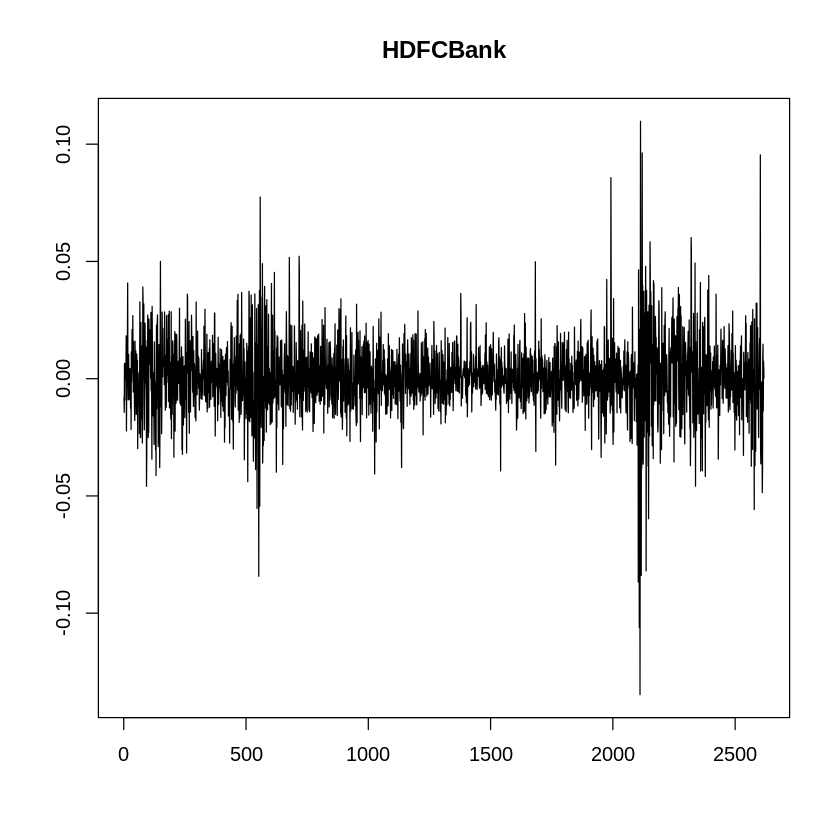

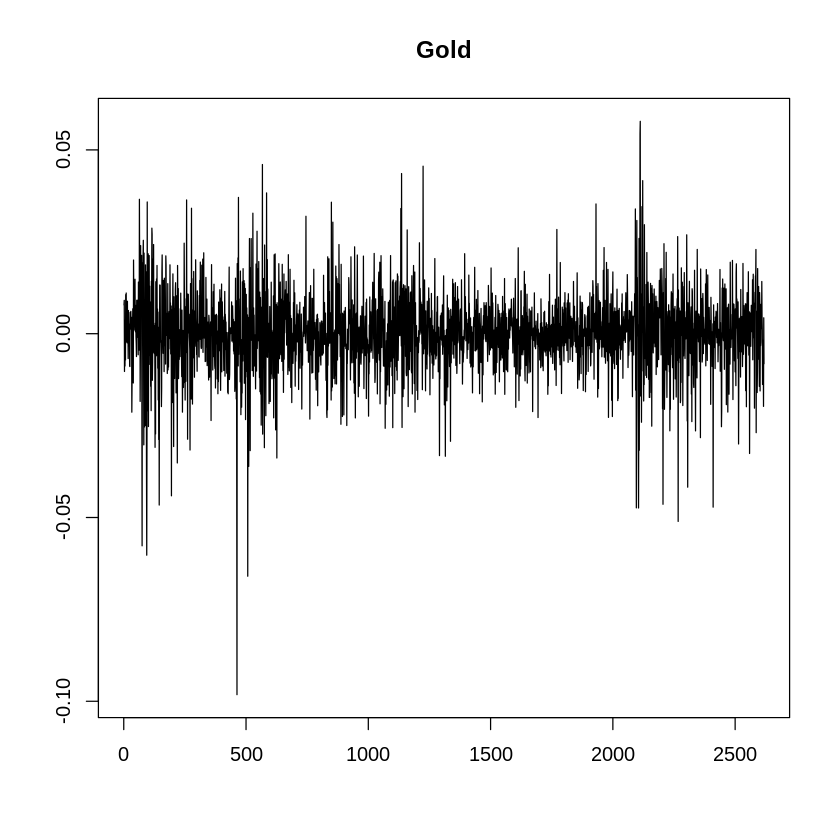

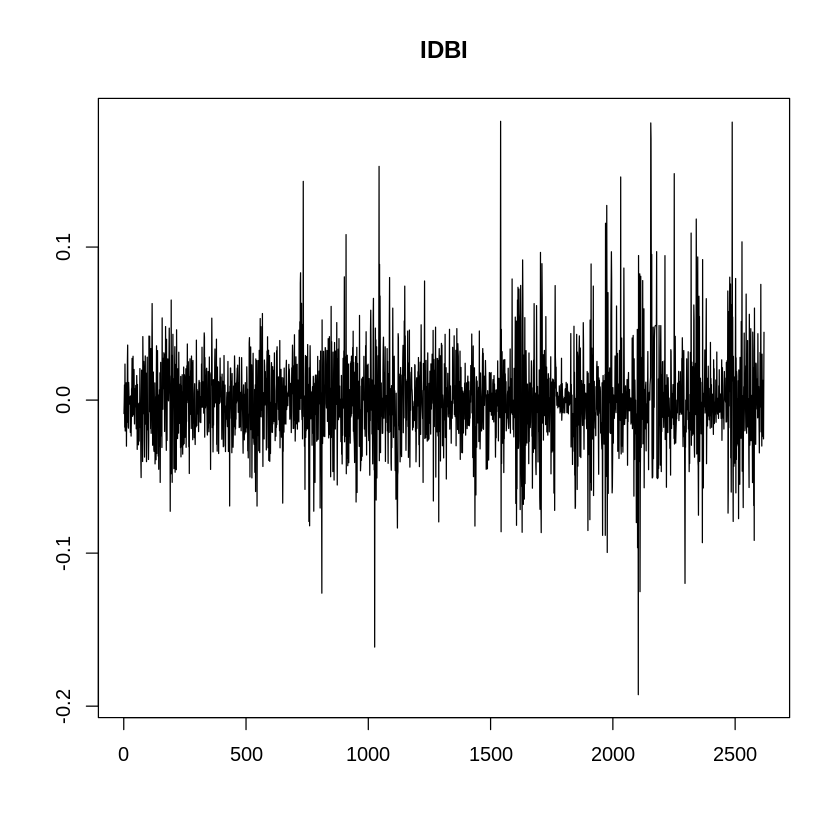

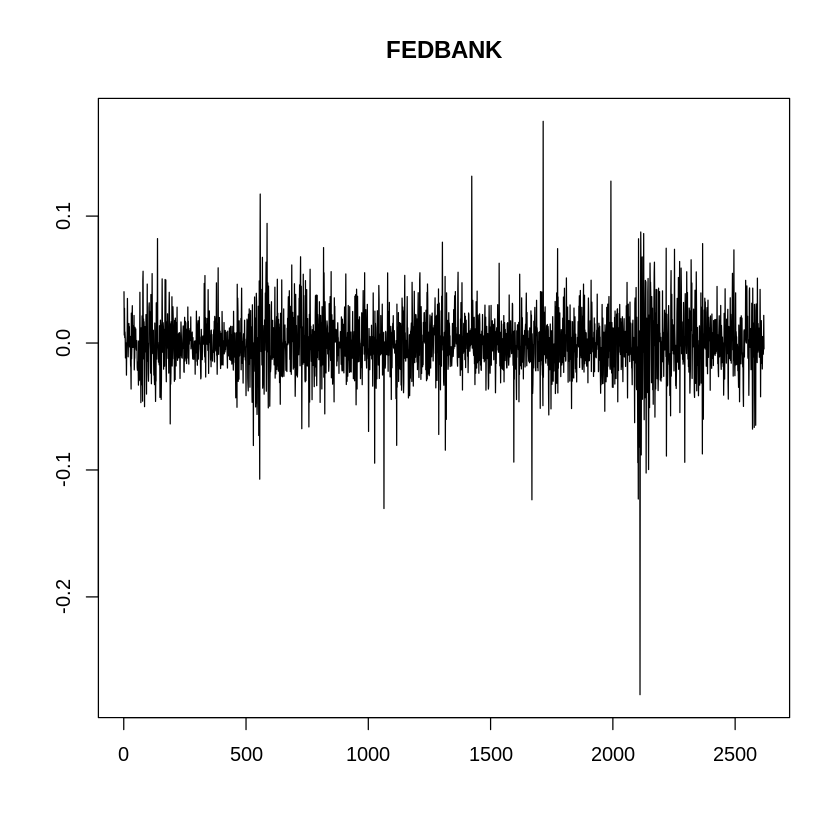

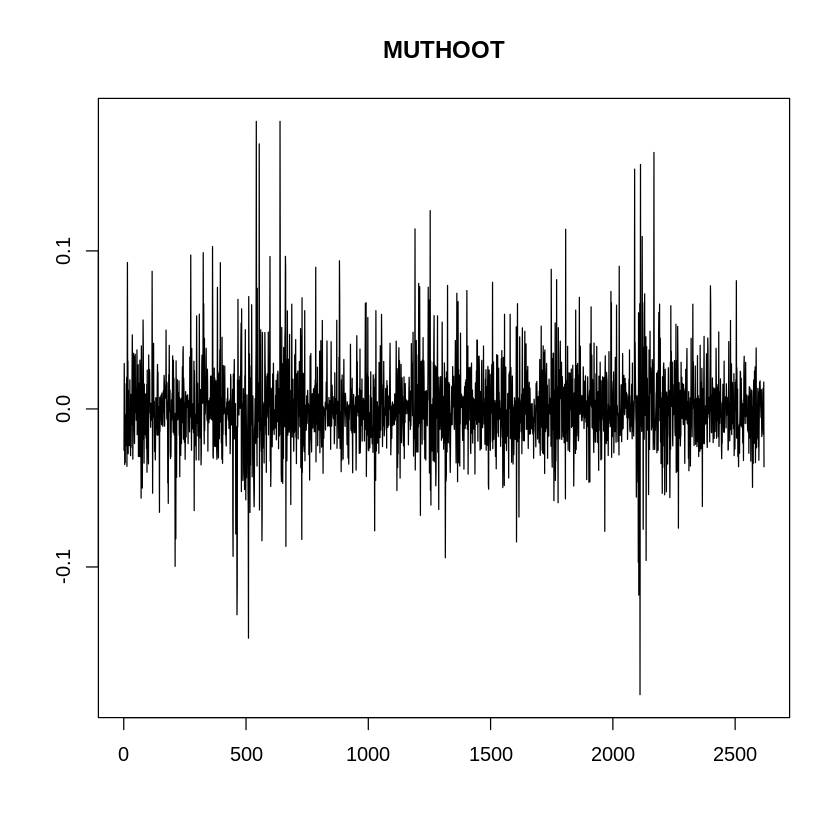

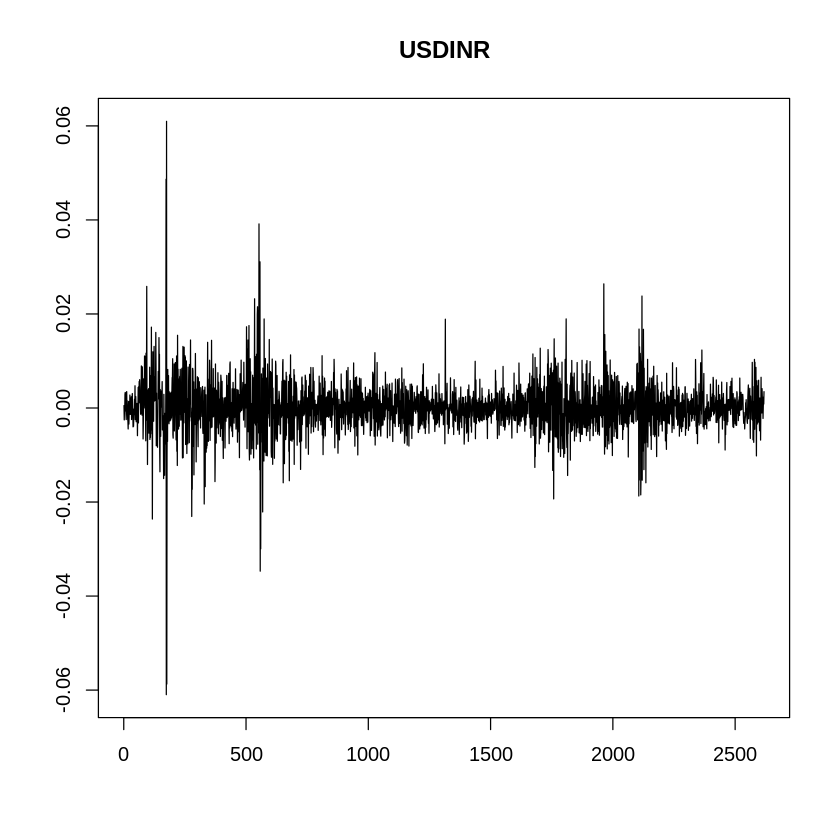

In [69]:
layout(matrix(1:5, nrow = 1, ncol = 1))
plot.ts(master_returns$HDFCBANK.NS.Adjusted, main = "HDFCBank", ylab = "", xlab = "")
plot.ts(master_returns$GC.F.Adjusted, main = "Gold", ylab = "", xlab = "")
plot.ts(master_returns$IDBI.NS.Adjusted, main = "IDBI", ylab = "", xlab = "")
plot.ts(master_returns$FEDERALBNK.NS.Adjusted, main = "FEDBANK", ylab = "", xlab = "")
plot.ts(master_returns$MUTHOOTFIN.NS.Adjusted, main = "MUTHOOT", ylab = "", xlab = "")
plot.ts(master_returns$INR.X.Adjusted, main = "USDINR", ylab = "", xlab = "")

In [70]:

par(mar=c(0,0,0,0))
VARselect(master_returns, lag.max = 30, type = "const")



,1,2,3,4,5,6,7,8,9,10,⋯,21,22,23,24,25,26,27,28,29,30
AIC(n),-5.041860e+01,-5.043420e+01,-5.042611e+01,-5.041673e+01,-5.040867e+01,-5.039927e+01,-5.038603e+01,-5.037260e+01,-5.036465e+01,-5.035117e+01,⋯,-5.024479e+01,-5.023091e+01,-5.021100e+01,-5.020237e+01,-5.018778e+01,-5.017417e+01,-5.016022e+01,-5.014021e+01,-5.012606e+01,-5.011385e+01
HQ(n),-5.038415e+01,-5.037021e+01,-5.033258e+01,-5.029367e+01,-5.025607e+01,-5.021714e+01,-5.017437e+01,-5.013140e+01,-5.009392e+01,-5.005090e+01,⋯,-4.961964e+01,-4.957623e+01,-4.952678e+01,-4.948861e+01,-4.944449e+01,-4.940134e+01,-4.935786e+01,-4.930832e+01,-4.926463e+01,-4.922288e+01
SC(n),-5.032352e+01,-5.025763e+01,-5.016804e+01,-5.007716e+01,-4.998761e+01,-4.989672e+01,-4.980198e+01,-4.970705e+01,-4.961761e+01,-4.952263e+01,⋯,-4.851980e+01,-4.842442e+01,-4.832302e+01,-4.823289e+01,-4.813680e+01,-4.804170e+01,-4.794625e+01,-4.784475e+01,-4.774910e+01,-4.765539e+01
FPE(n),1.269050e-22,1.249409e-22,1.259563e-22,1.271435e-22,1.281726e-22,1.293835e-22,1.311086e-22,1.328833e-22,1.339450e-22,1.357643e-22,⋯,1.510671e-22,1.531889e-22,1.562818e-22,1.576504e-22,1.599816e-22,1.621893e-22,1.644852e-22,1.678290e-22,1.702422e-22,1.723570e-22


,Estimate,Std. Error,t value,Pr(>|t|)
HDFCBANK.NS.Adjusted.l1,0.0241121042,0.022375539,1.0776100,2.813077e-01
GC.F.Adjusted.l1,0.0295794859,0.028075718,1.0535611,2.921817e-01
IDBI.NS.Adjusted.l1,-0.0318166599,0.011512582,-2.7636423,5.756240e-03
FEDERALBNK.NS.Adjusted.l1,0.0242560480,0.015052442,1.6114361,1.072059e-01
MUTHOOTFIN.NS.Adjusted.l1,0.0142464312,0.012243420,1.1635990,2.446932e-01
INR.X.Adjusted.l1,0.0092449026,0.059154448,0.1562842,8.758212e-01
HDFCBANK.NS.Adjusted.l2,-0.0939752711,0.022777638,-4.1257689,3.810947e-05
GC.F.Adjusted.l2,0.0383500248,0.028590089,1.3413748,1.799158e-01
IDBI.NS.Adjusted.l2,0.0133978057,0.011552791,1.1597030,2.462761e-01
FEDERALBNK.NS.Adjusted.l2,-0.0066254041,0.015031920,-0.4407557,6.594265e-01



VAR Estimation Results:
Endogenous variables: HDFCBANK.NS.Adjusted, GC.F.Adjusted, IDBI.NS.Adjusted, FEDERALBNK.NS.Adjusted, MUTHOOTFIN.NS.Adjusted, INR.X.Adjusted 
Deterministic variables: const 
Sample size: 2616 
Log Likelihood: 43823.249 
Roots of the characteristic polynomial:
0.3504 0.3504 0.3043 0.2629 0.2389 0.2389 0.1829 0.1829 0.1746 0.1746 0.1554 0.1554
Call:
VAR(y = master_returns, p = 2, type = "const")


Estimation results for equation HDFCBANK.NS.Adjusted: 
HDFCBANK.NS.Adjusted = HDFCBANK.NS.Adjusted.l1 + GC.F.Adjusted.l1 + IDBI.NS.Adjusted.l1 + FEDERALBNK.NS.Adjusted.l1 + MUTHOOTFIN.NS.Adjusted.l1 + INR.X.Adjusted.l1 + HDFCBANK.NS.Adjusted.l2 + GC.F.Adjusted.l2 + IDBI.NS.Adjusted.l2 + FEDERALBNK.NS.Adjusted.l2 + MUTHOOTFIN.NS.Adjusted.l2 + INR.X.Adjusted.l2 + const 

                            Estimate Std. Error t value Pr(>|t|)    
HDFCBANK.NS.Adjusted.l1    0.0241121  0.0223755   1.078  0.28131    
GC.F.Adjusted.l1           0.0295795  0.0280757   1.054  0.29218   

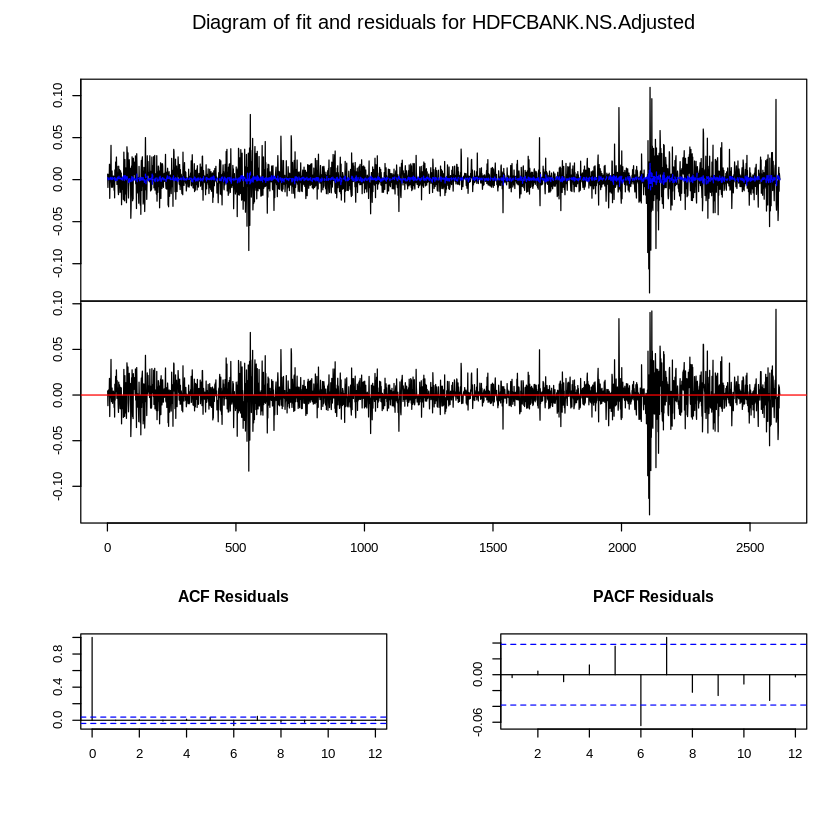

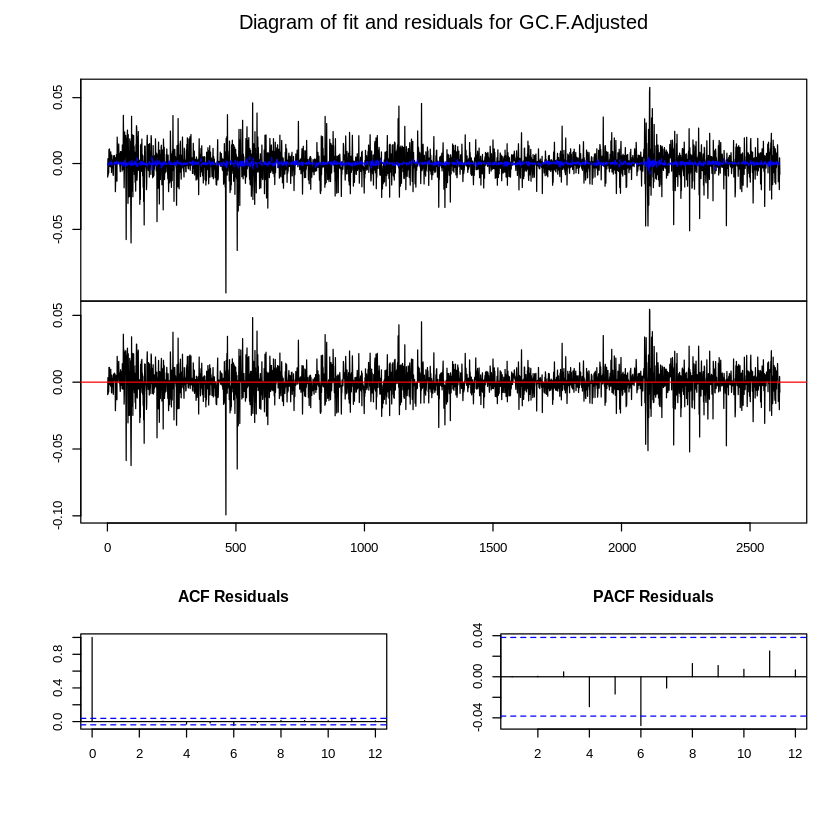

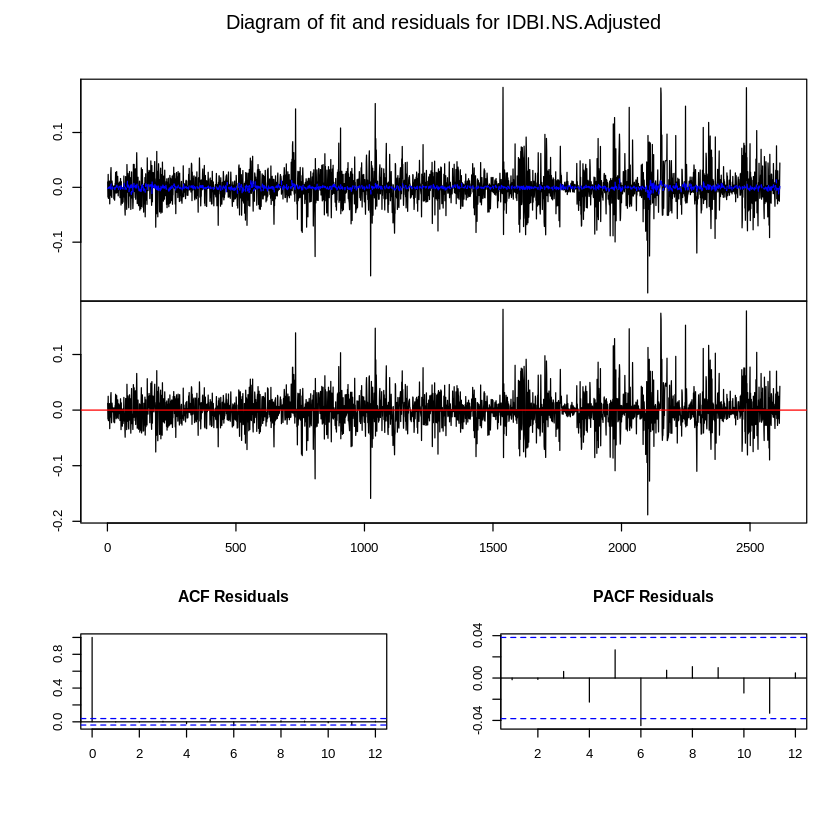

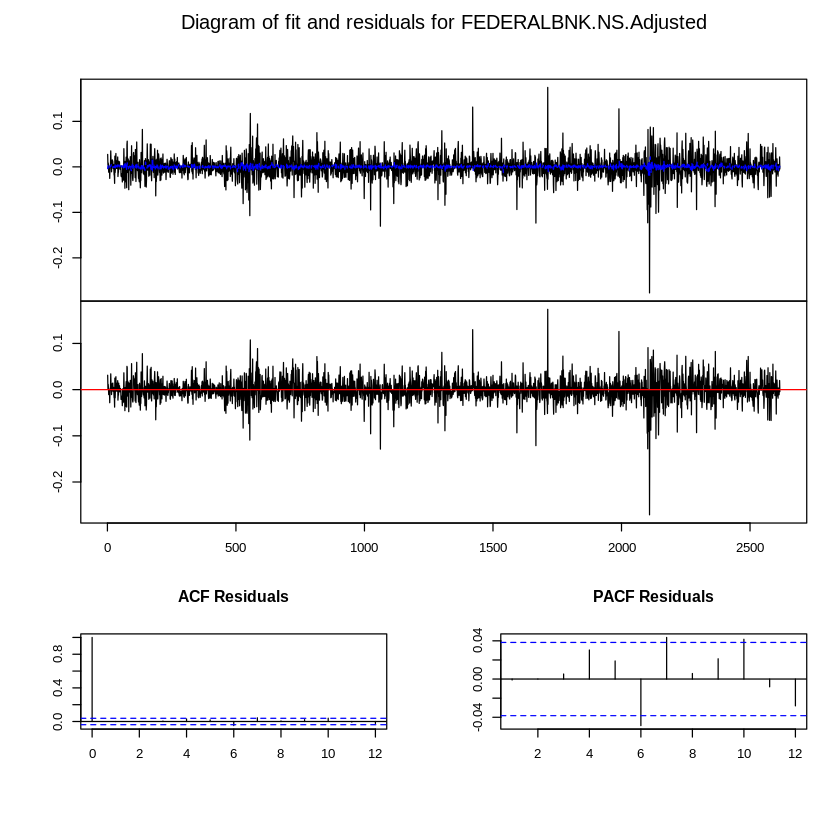

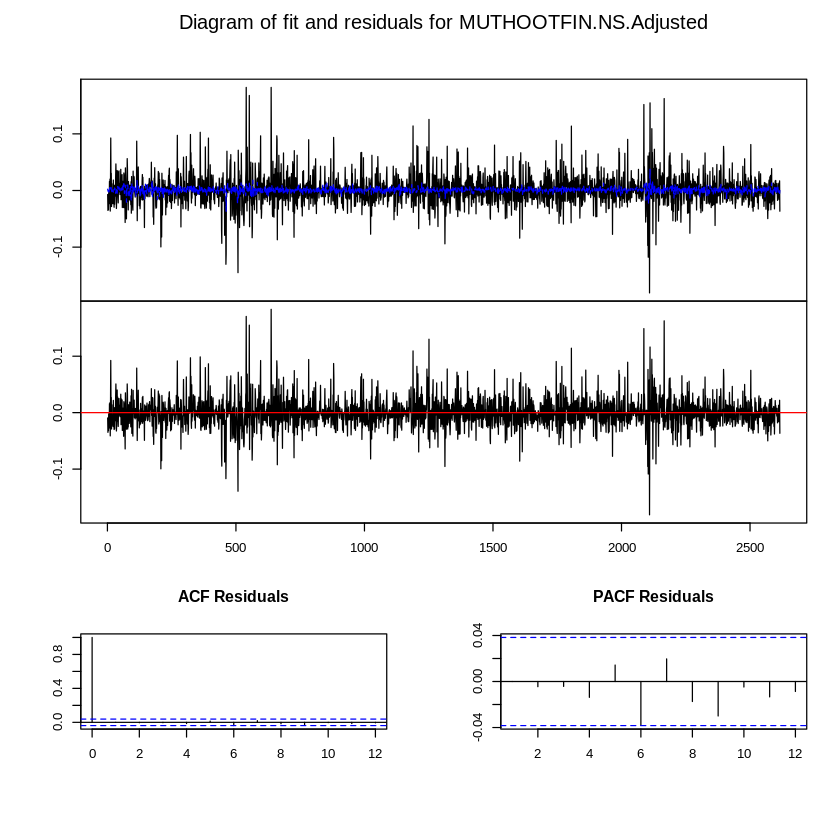

[1] 0.3504378 0.3504378 0.3042938 0.2629254 0.2388583 0.2388583 0.1829247
 [8] 0.1829247 0.1745565 0.1745565 0.1553849 0.1553849

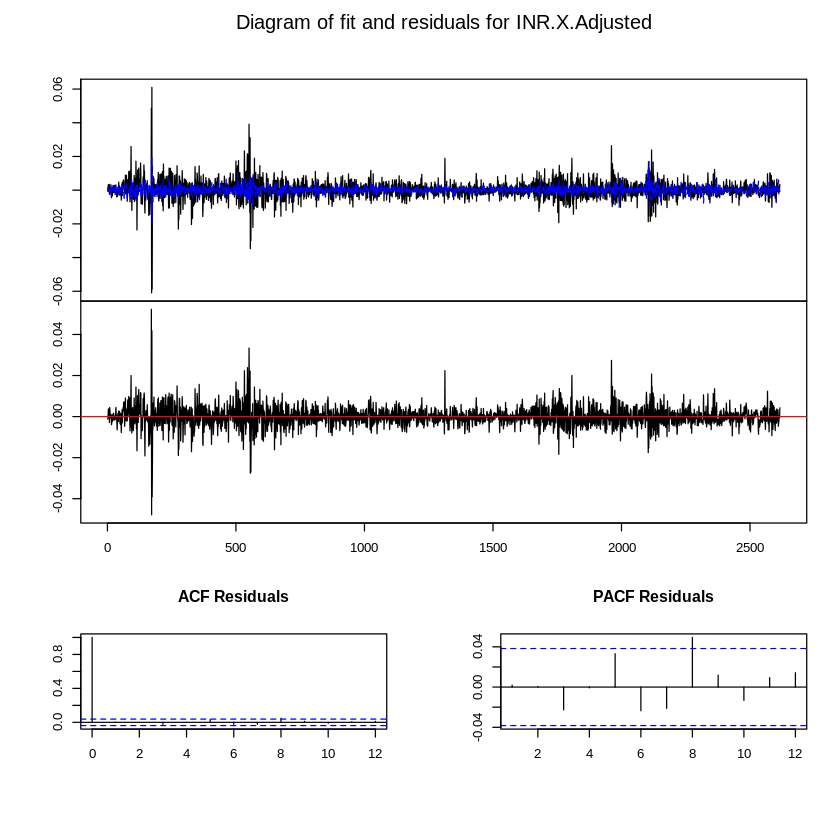

In [71]:
var1 <- VAR(master_returns, p = 2, type = "const")
coef(var1)
summary(var1)
par(mfrow = c(1,1))
plot(var1)
roots(var1)

In [72]:
var1_rest <- restrict(var1, method = "ser", thresh = 2)
var1_rest$restrictions
rowSums(var1_rest$restrictions)
Bcoef(var1_rest)
Acoef(var1_rest)

,HDFCBANK.NS.Adjusted.l1,GC.F.Adjusted.l1,IDBI.NS.Adjusted.l1,FEDERALBNK.NS.Adjusted.l1,MUTHOOTFIN.NS.Adjusted.l1,INR.X.Adjusted.l1,HDFCBANK.NS.Adjusted.l2,GC.F.Adjusted.l2,IDBI.NS.Adjusted.l2,FEDERALBNK.NS.Adjusted.l2,MUTHOOTFIN.NS.Adjusted.l2,INR.X.Adjusted.l2,const
HDFCBANK.NS.Adjusted,0,0,1,1,0,0,1,0,0,0,0,0,1
GC.F.Adjusted,0,0,0,0,0,0,0,0,0,0,1,0,0
IDBI.NS.Adjusted,1,0,0,0,0,0,1,0,0,0,0,0,0
FEDERALBNK.NS.Adjusted,1,0,0,0,0,0,0,0,0,1,0,1,0
MUTHOOTFIN.NS.Adjusted,0,1,0,0,0,0,0,1,0,0,0,0,0
INR.X.Adjusted,1,1,1,1,0,1,1,1,0,0,0,0,1


HDFCBANK.NS.Adjusted          GC.F.Adjusted       IDBI.NS.Adjusted 
                     4                      1                      2 
FEDERALBNK.NS.Adjusted MUTHOOTFIN.NS.Adjusted         INR.X.Adjusted 
                     3                      2                      8

,HDFCBANK.NS.Adjusted.l1,GC.F.Adjusted.l1,IDBI.NS.Adjusted.l1,FEDERALBNK.NS.Adjusted.l1,MUTHOOTFIN.NS.Adjusted.l1,INR.X.Adjusted.l1,HDFCBANK.NS.Adjusted.l2,GC.F.Adjusted.l2,IDBI.NS.Adjusted.l2,FEDERALBNK.NS.Adjusted.l2,MUTHOOTFIN.NS.Adjusted.l2,INR.X.Adjusted.l2,const
HDFCBANK.NS.Adjusted,0.00000000,0.00000000,-0.02814577,0.03332354,0,0.0000000,-0.09517783,0.0000000,0,0.00000000,0.00000000,0.0000000,0.0007644596
GC.F.Adjusted,0.00000000,0.00000000,0.00000000,0.00000000,0,0.0000000,0.00000000,0.0000000,0,0.00000000,0.02715729,0.0000000,0.0000000000
IDBI.NS.Adjusted,0.13759000,0.00000000,0.00000000,0.00000000,0,0.0000000,0.11140012,0.0000000,0,0.00000000,0.00000000,0.0000000,0.0000000000
FEDERALBNK.NS.Adjusted,0.14288279,0.00000000,0.00000000,0.00000000,0,0.0000000,0.00000000,0.0000000,0,-0.06289977,0.00000000,-0.1969745,0.0000000000
MUTHOOTFIN.NS.Adjusted,0.00000000,0.33246600,0.00000000,0.00000000,0,0.0000000,0.00000000,0.1014967,0,0.00000000,0.00000000,0.0000000,0.0000000000
INR.X.Adjusted,-0.07381999,-0.06996849,-0.01402672,-0.01782717,0,-0.2687021,-0.02737077,-0.0193232,0,0.00000000,0.00000000,0.0000000,0.0003447304


,HDFCBANK.NS.Adjusted.l1,GC.F.Adjusted.l1,IDBI.NS.Adjusted.l1,FEDERALBNK.NS.Adjusted.l1,MUTHOOTFIN.NS.Adjusted.l1,INR.X.Adjusted.l1
HDFCBANK.NS.Adjusted,0.00000000,0.00000000,-0.02814577,0.03332354,0,0.0000000
GC.F.Adjusted,0.00000000,0.00000000,0.00000000,0.00000000,0,0.0000000
IDBI.NS.Adjusted,0.13759000,0.00000000,0.00000000,0.00000000,0,0.0000000
FEDERALBNK.NS.Adjusted,0.14288279,0.00000000,0.00000000,0.00000000,0,0.0000000
MUTHOOTFIN.NS.Adjusted,0.00000000,0.33246600,0.00000000,0.00000000,0,0.0000000
INR.X.Adjusted,-0.07381999,-0.06996849,-0.01402672,-0.01782717,0,-0.2687021
,HDFCBANK.NS.Adjusted.l2,GC.F.Adjusted.l2,IDBI.NS.Adjusted.l2,FEDERALBNK.NS.Adjusted.l2,MUTHOOTFIN.NS.Adjusted.l2,INR.X.Adjusted.l2
HDFCBANK.NS.Adjusted,-0.09517783,0.0000000,0,0.00000000,0.00000000,0.0000000
GC.F.Adjusted,0.00000000,0.0000000,0,0.00000000,0.02715729,0.0000000
IDBI.NS.Adjusted,0.11140012,0.0000000,0,0.00000000,0.00000000,0.0000000


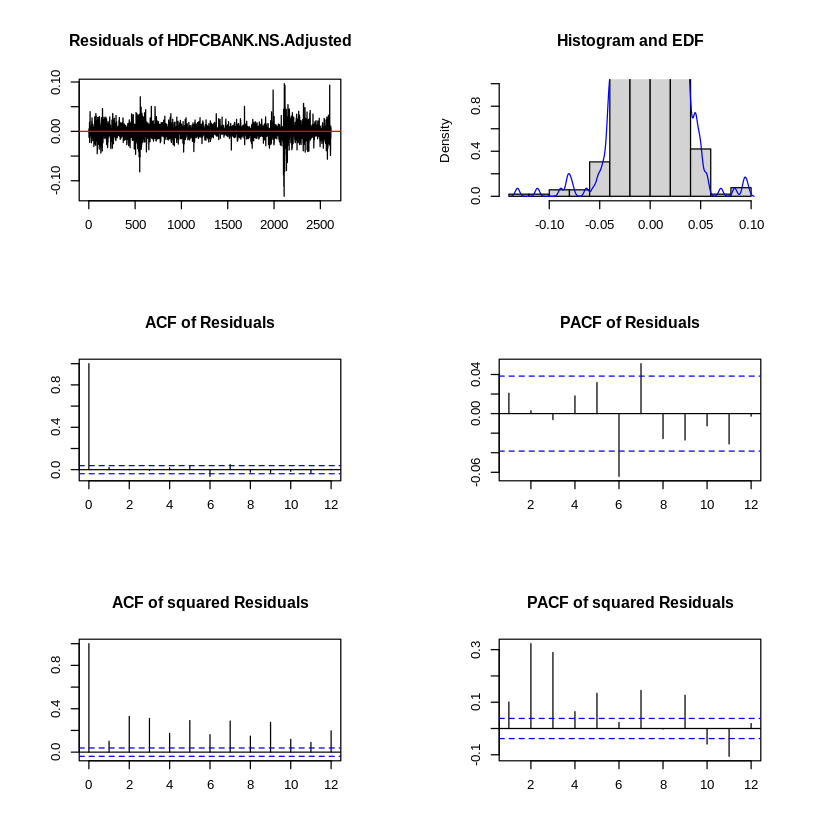

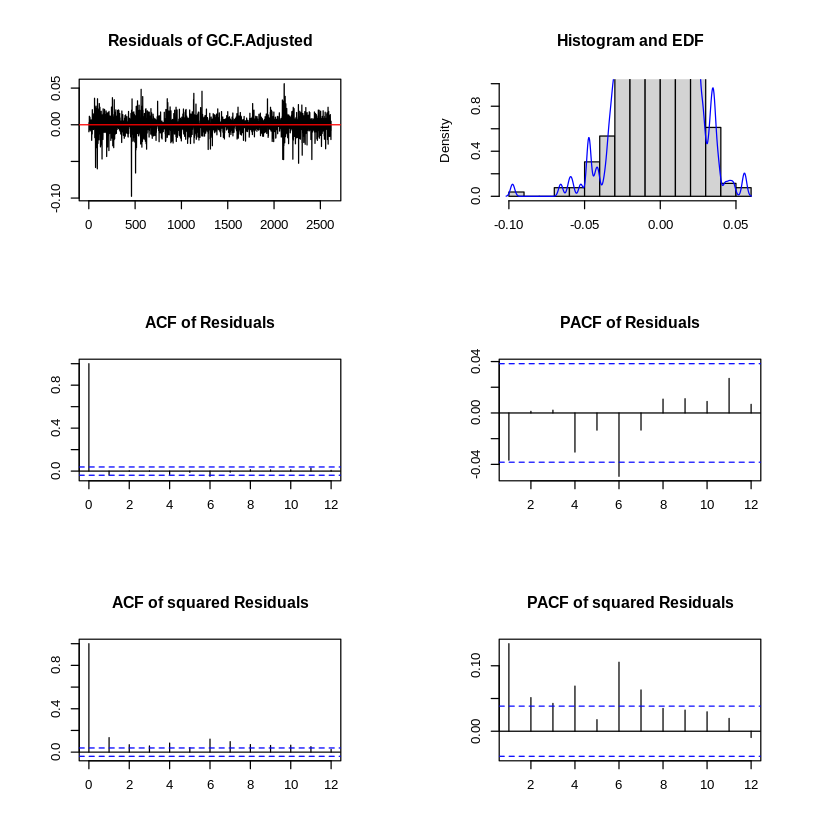

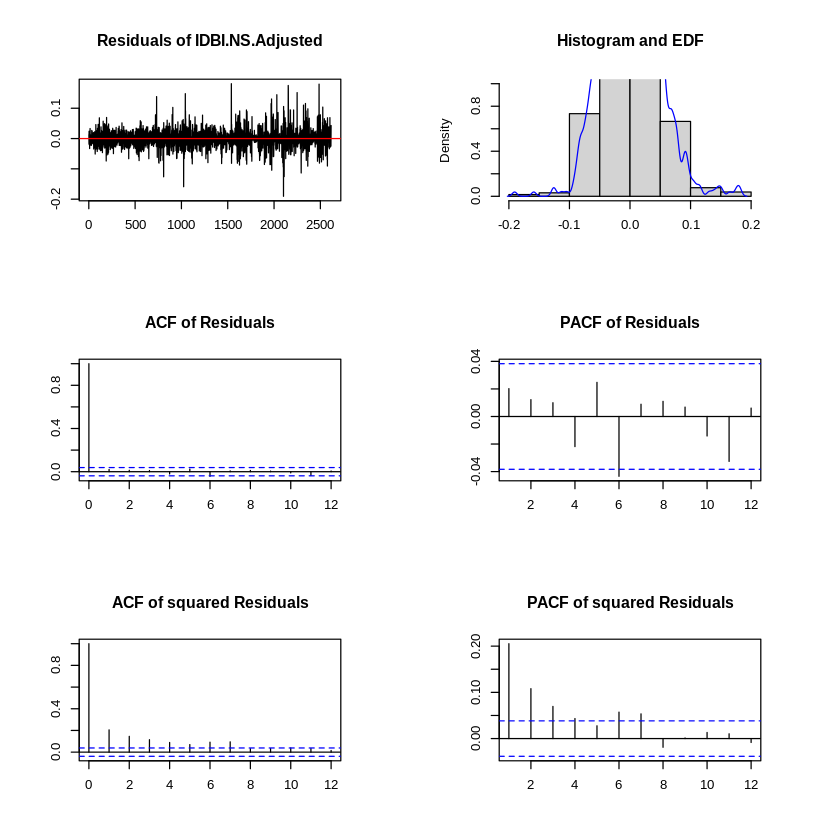

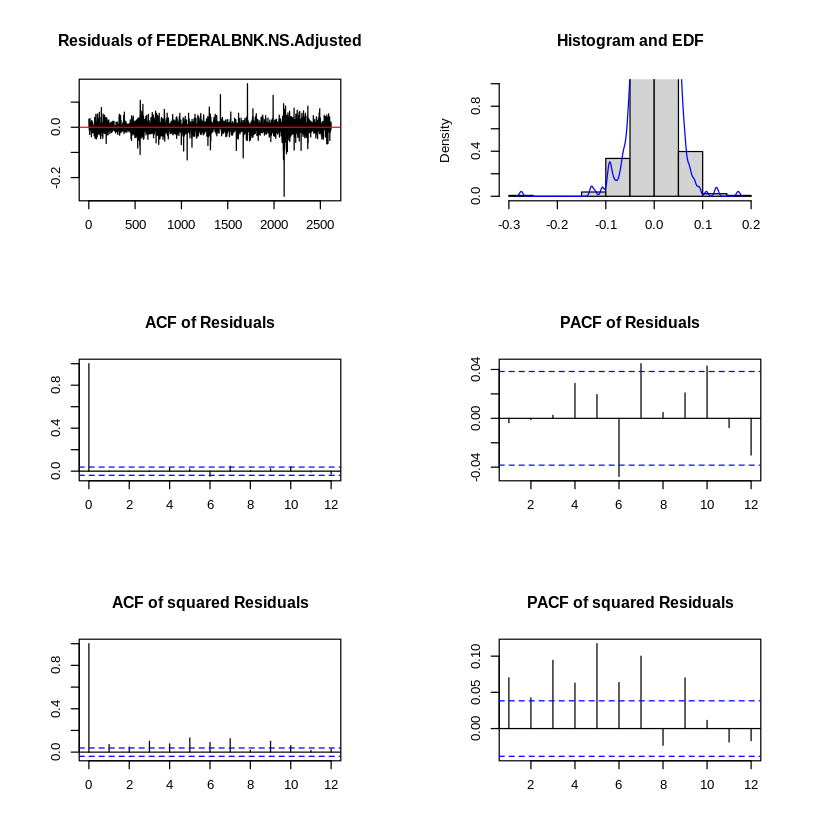

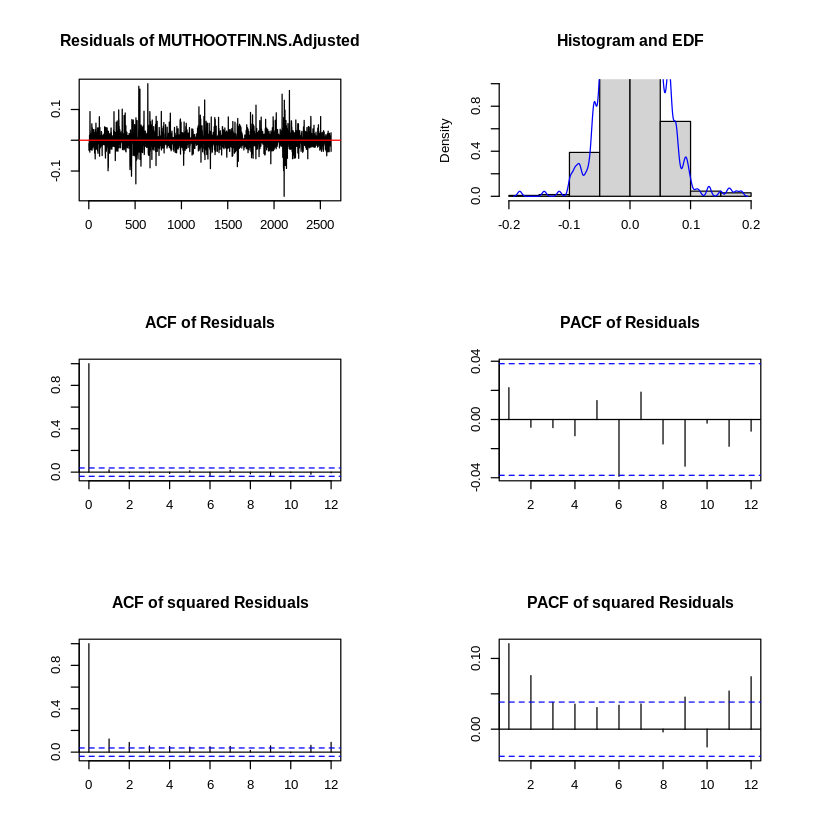

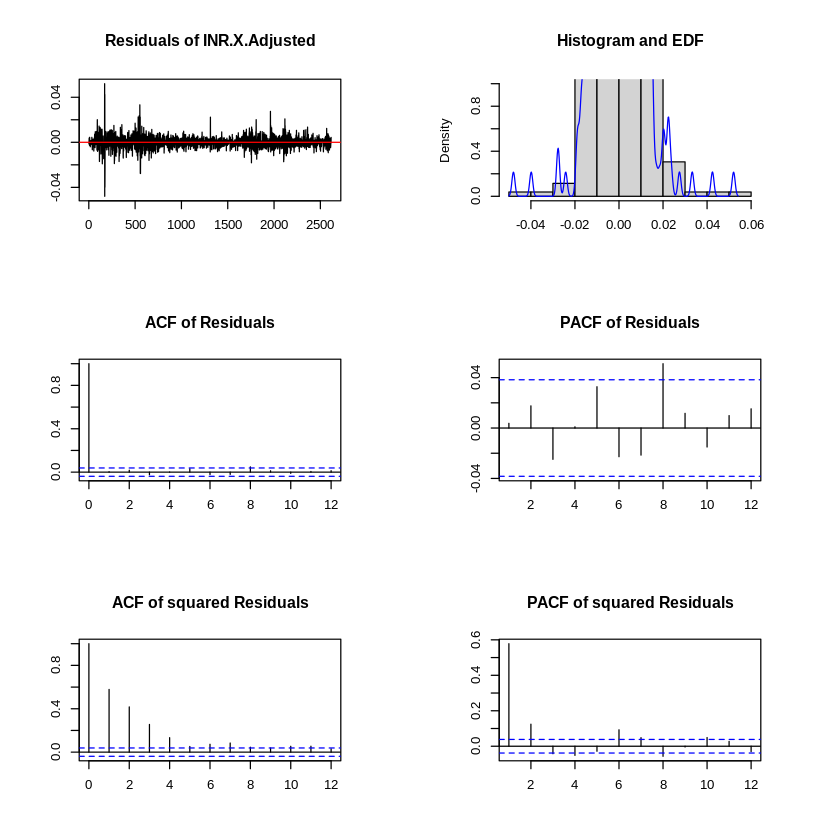

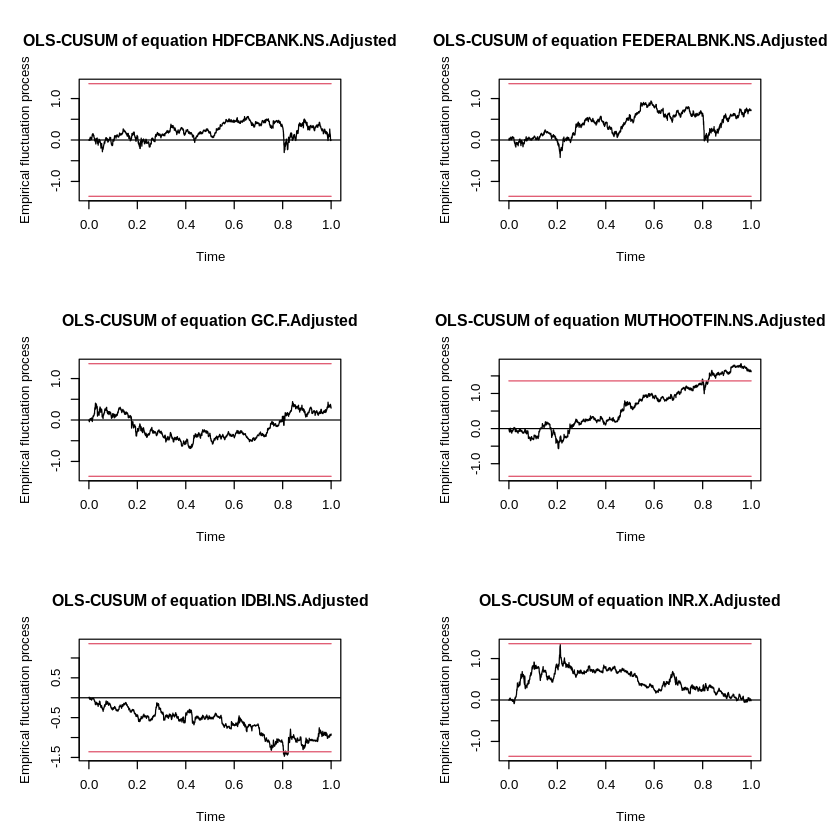

In [73]:
par(mar = c(5,5,5,5))
var1_rest.arch <- arch.test(var1_rest)
var1_rest.norm <- normality.test(var1_rest, multivariate.only = TRUE)
plot(var1_rest.norm)
var1_rest.pt.asy <- serial.test(var1_rest, lags.pt = 10, type = "PT.asymptotic")
var1_rest.pt.adj <- serial.test(var1_rest, lags.pt = 10, type = "PT.adjusted")
var1_rest.BG <- serial.test(var1_rest, lags.pt = 10, type = "BG")
var1_rest.ES <- serial.test(var1_rest, lags.pt = 10, type = "ES")
var1.stab <- stability(var1_rest, type = "OLS-CUSUM")
plot(var1.stab)

In [75]:
y4<-c()
numrows <-nrow(master_returns)
for (i in 1:1000) {
  
  var1 <- VAR(master_returns[(i:(i+numrows-1001)),], p = 5, type = "const")
  forecasts <- predict(var1)
  y<-forecasts$fcst$HDFCBANK.NS.Adjusted[1,1]
  y4<-c(y4,y)
}

RMSE(y4,tail(master_returns$HDFCBANK.NS.Adjusted,1000))


[1] 0.01826744

In [78]:
# Forecasting with Machine Learning

B_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$HDFCBANK.NS.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(B_Lag)<-paste0("HDFC_",1:10)
G_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$GC.F.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(G_Lag)<-paste0("TreasuryYield_",1:10)
F_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$FEDERALBNK.NS.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(F_Lag)<-paste0("FEDBANK_",1:10)
I_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$IDBI.NS.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(I_Lag)<-paste0("IDBI_",1:10)
U_Lag<-as.data.frame(matrix(unlist(shift(x=master_returns$INR.X.Adjusted, n=1:10, fill=NA, type="lag", give.names=FALSE)),ncol = 10))
names(U_Lag)<-paste0("USDINR_",1:10)

master2<-cbind(as.data.frame(master_returns),B_Lag,G_Lag,F_Lag,I_Lag,U_Lag)
master2<-na.omit(master2)

In [80]:
numrows<-nrow(master2)
traindata<-master2[1:(numrows-1000),]
testdata<-master2[(numrows-999):(numrows),]

In [81]:
# Multiple Linear Regression Model
model4<-caret::train(HDFCBANK.NS.Adjusted~., data = traindata, method = "lm",
                     preProcess = c("YeoJohnson","pca"),
                     trControl = trainControl(method = "cv"),
                     tuneLength = 5
)
pred<-predict(model4,testdata)
RMSE(pred,tail(master_returns$HDFCBANK.NS.Adjusted,1000)) 

[1] 0.01586635

In [83]:
model5<-caret::train(HDFCBANK.NS.Adjusted~., data = traindata, method = "svmLinear3",
                     preProcess = c("pca"),
                     trControl = trainControl(method = "cv"),
                     tuneLength = 5
)
pred<-predict(model5,testdata)
RMSE(pred,tail(master_returns$HDFCBANK.NS.Adjusted,1000)) 

Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided for svr_eps. Using default of 0.1”
Warning message in LiblineaR::LiblineaR(data = as.matrix(x), target = y, cost = param$cost, :
“No value provided

[1] 0.01798773

In [87]:
model6<-caret::train(HDFCBANK.NS.Adjusted~., data = traindata, method = "ranger",
                     #preProcess = c("pca"),
                     trControl = trainControl(method = "cv"),
                     tuneLength = 5
)
pred<-predict(model6,testdata)
RMSE(pred,tail(master_returns$HDFCBANK.NS.Adjusted,1000)) 

[1] 0.0162899

In [88]:
# Gradient Boosting Model

model7<-caret::train(HDFCBANK.NS.Adjusted~., data = traindata, method = "xgbLinear",
                     #preProcess = c("pca"),
                     trControl = trainControl(method = "cv"),
                     tuneLength = 5
)
pred<-predict(model7,testdata)
RMSE(pred,tail(master_returns$HDFCBANK.NS.Adjusted,1000))

[1] 0.01701813